In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import os

In [2]:
df_china = pd.read_csv('output/merged_china.csv')
df_us = pd.read_csv('output/merged_us.csv')
df_india = pd.read_csv('output/merged_india.csv')

In [3]:
## TO DO
# come up with 2 EDA questions + 1 ML question
# ...


In [4]:
df_china.shape
df_china

year        co2  co2_growth_prct  co2_growth_abs  co2_per_capita  \
0   2001   3514.934             2.20          75.782           2.706   
1   2002   3872.595            10.18         357.662           2.962   
2   2003   4545.014            17.36         672.419           3.456   
3   2004   5223.755            14.93         678.741           3.948   
4   2005   5876.555            12.50         652.801           4.416   
5   2006   6488.804            10.42         612.248           4.848   
6   2007   6978.612             7.55         489.808           5.185   
7   2008   7496.832             7.43         518.220           5.539   
8   2009   7886.533             5.20         389.701           5.794   
9   2010   8616.653             9.26         730.120           6.295   
10  2011   9528.556            10.58         911.903           6.922   
11  2012   9775.622             2.59         247.066           7.062   
12  2013   9952.744             1.81         177.122           7.151   
13  2014   9985.583             0.33          32.840           7.135   
14  2015   9848.420            -1.37        -137.164           7.000   
15  2016   9720.444            -1.30        -127.976           6.874   
16  2017   9920.459             2.06         200.015           6.981   
17  2018  10289.990             3.72         369.530           7.208   
18  2019  10489.989             1.94         199.999           7.316   
19  2020  10667.887             1.70         177.899           7.412   

    share_global_co2  cumulative_co2  share_global_cumulative_co2  \
0              13.81       78398.967                         7.32   
1              14.87       82271.562                         7.50   
2              16.61       86816.576                         7.72   
3              18.25       92040.331                         7.99   
4              19.85       97916.886                         8.28   
5              21.22      104405.690                         8.61   
6              22.16      111384.302                         8.95   
7              23.38      118881.134                         9.31   
8              24.95      126767.667                         9.69   
9              25.84      135384.319                        10.09   
10             27.64      144912.875                        10.53   
11             27.95      154688.497                        10.97   
12             28.21      164641.241                        11.39   
13             28.10      174626.824                        11.79   
14             27.74      184475.244                        12.16   
15             27.42      194195.688                        12.51   
16             27.61      204116.147                        12.85   
17             28.08      214406.137                        13.19   
18             28.58      224896.125                        13.53   
19             30.65      235564.013                        13.89   

    co2_per_gdp  coal_co2  ...  \
0      0.555000  2428.857  ...   
1      0.568000  2778.770  ...   
2      0.627000  3319.280  ...   
3      0.667000  3835.288  ...   
4      0.683000  4424.390  ...   
5      0.684000  4905.374  ...   
6      0.674000  5289.904  ...   
7      0.694000  5729.474  ...   
8      0.682000  6028.500  ...   
9      0.670000  6568.794  ...   
10     0.697000  7309.786  ...   
11     0.681000  7464.806  ...   
12     0.650000  7493.454  ...   
13     0.616000  7425.069  ...   
14     0.589000  7266.979  ...   
15     0.563000  7071.406  ...   
16     0.564000  7137.264  ...   
17     0.567000  7316.400  ...   
18    34.581311  7377.670  ...   
19    38.993568  7421.101  ...   

    Renewable electricity output (% of total electricity output)  \
0                                           18.958519              
1                                           17.618628              
2                                           15.037040              
3                                           16.223266 

In [5]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 82 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   year                                                                                       20 non-null     int64  
 1   co2                                                                                        20 non-null     float64
 2   co2_growth_prct                                                                            20 non-null     float64
 3   co2_growth_abs                                                                             20 non-null     float64
 4   co2_per_capita                                                                             20 non-null     float64
 5   share_global_co2                                    

In [6]:
df_china.describe()

year           co2  co2_growth_prct  co2_growth_abs  \
count    20.00000     20.000000        20.000000       20.000000   
mean   2010.50000   8033.999050         5.954500      361.436800   
std       5.91608   2374.496593         5.447254      293.493514   
min    2001.00000   3514.934000        -1.370000     -137.164000   
25%    2005.75000   6335.741750         1.907500      177.704750   
50%    2010.50000   9072.604500         4.460000      363.596000   
75%    2015.25000   9928.530250        10.240000      622.386250   
max    2020.00000  10667.887000        17.360000      911.903000   

       co2_per_capita  share_global_co2  cumulative_co2  \
count       20.000000         20.000000       20.000000   
mean         5.810500         24.146000   146539.511250   
std          1.579286          5.085572    50704.547383   
min          2.706000         13.810000    78398.967000   
25%          4.740000         20.877500   102783.489000   
50%          6.584500         26.630000   140148.597000   
75%          7.080250         27.982500   186905.355000   
max          7.412000         30.650000   235564.013000   

       share_global_cumulative_co2  co2_per_gdp     coal_co2  ...  \
count                    20.000000    20.000000    20.000000  ...   
mean                     10.413500     4.250294  5929.628300  ...   
std                       2.164788    11.150580  1736.670163  ...   
min                       7.320000     0.555000  2428.857000  ...   
25%                       8.527500     0.583750  4785.128000  ...   
50%                      10.310000     0.668500  6820.100000  ...   
75%                      12.247500     0.683250  7331.717500  ...   
max                      13.890000    38.993568  7493.454000  ...   

       Population in urban agglomerations of more than 1 million (% of total population)  \
count                                          20.000000                                   
mean                                           23.414428                                   
std                                             3.586893                                   
min                                            17.792219                                   
25%                                            20.416399                                   
50%                                            23.571599                                   
75%                                            26.269923                                   
max                                            29.221122                                   

       Population, total  \
count       2.000000e+01   
mean        1.340414e+09   
std         4.062762e+07   
min         1.271850e+09   
25%         1.309195e+09   
50%         1.340918e+09   
75%         1.373081e+09   
max         1.402112e+09   

       Renewable electricity output (% of total electricity output)  \
count                                          20.000000              
mean                                           14.294186              
std                                             7.385530              
min                                            -1.722419              
25%                                            12.689761              
50%                                            16.492518              
75%                                            18.706749              
max                                            23.926817              

       Renewable energy consumption (% of total final energy consumption)  \
count                                          20.000000                    
mean                                           17.368980                    
std                                             6.958038                    
min                                            11.338200                    
25%                                            12.257300                    
50%                                            13.784850      

<AxesSubplot:>

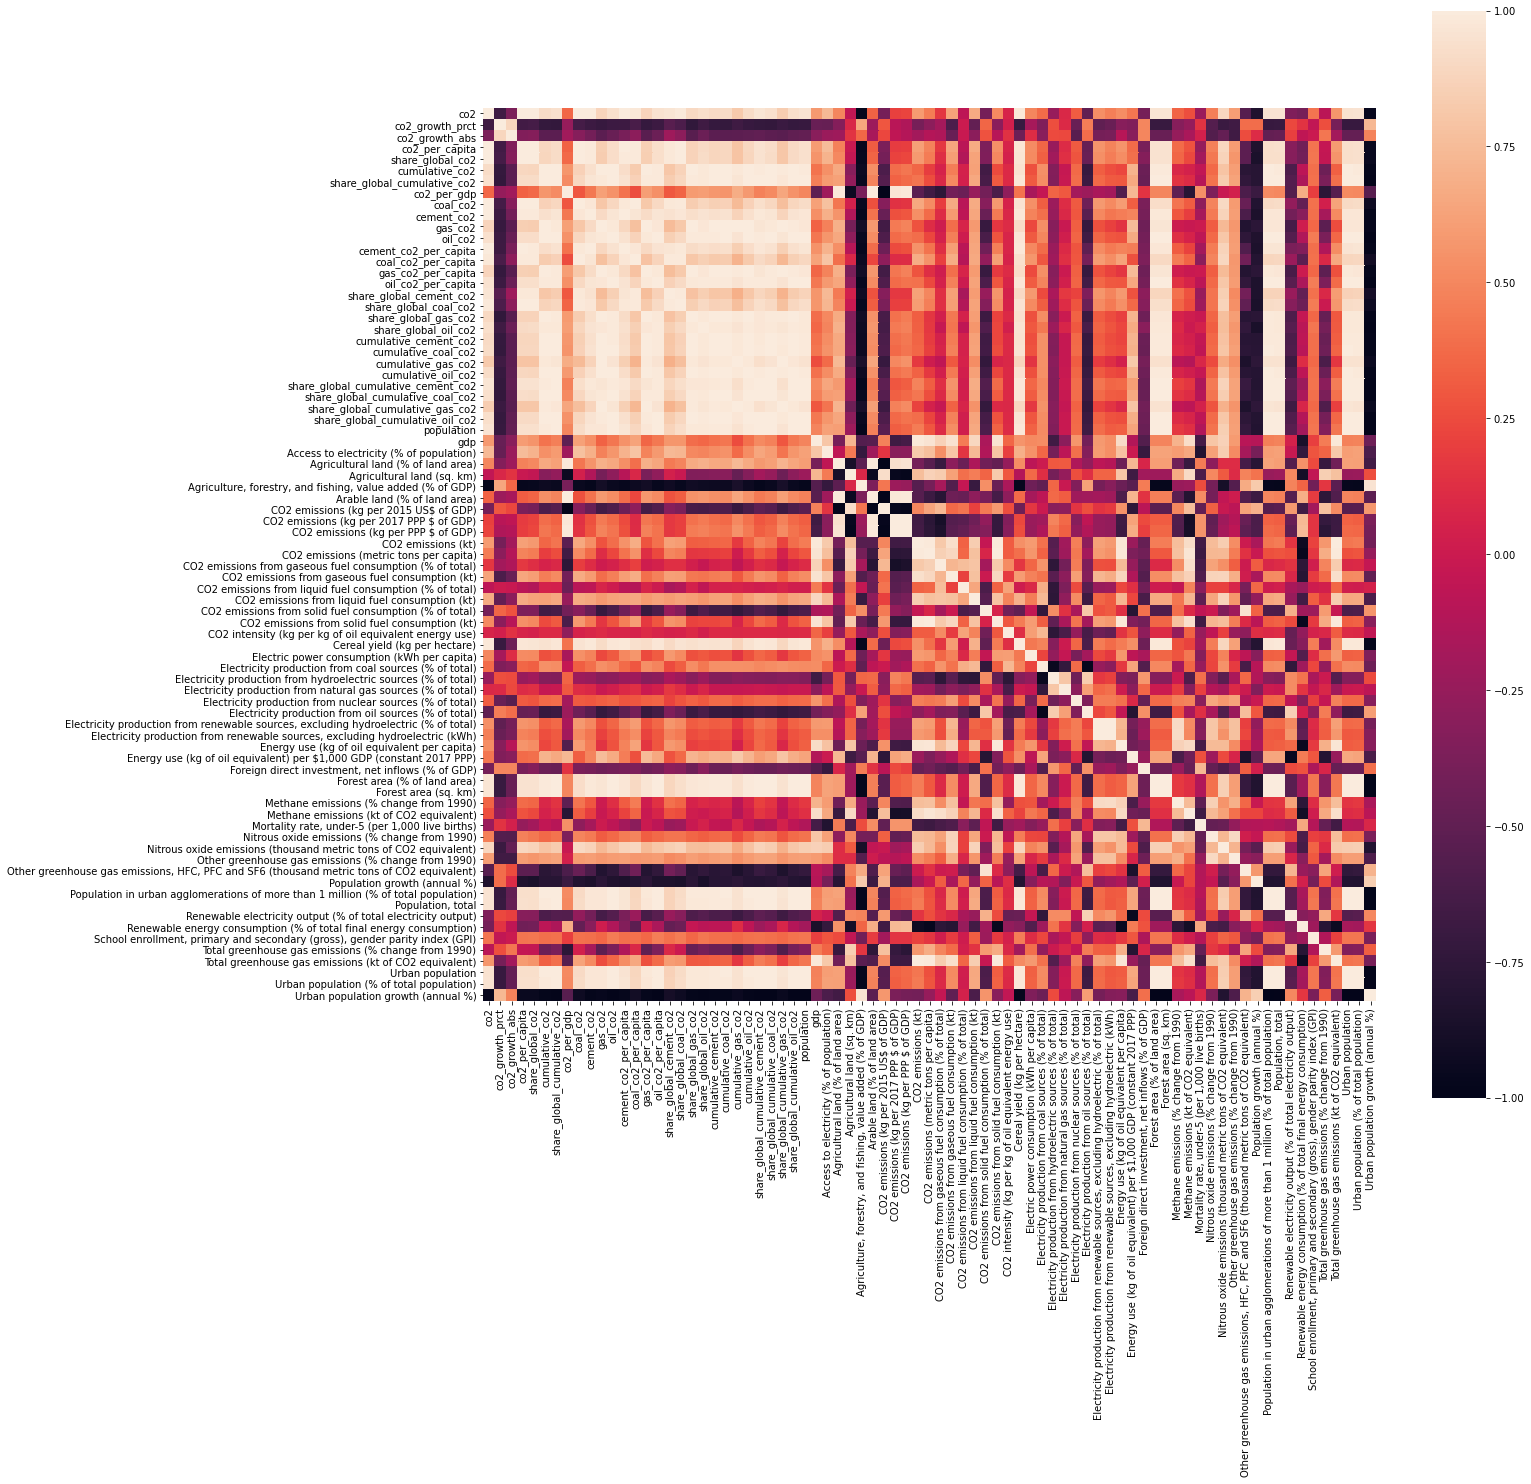

In [7]:
df_china_corr = df_china.iloc[:, 1:80].corr() # only numeric columns

plt.figure(figsize=(20, 20))
sns.heatmap(df_china_corr, square=True, vmin=-1, vmax=1, cmap='rocket')

<img src="https://i.kym-cdn.com/entries/icons/original/000/031/671/cover1.jpg" style="height:200px;">

<AxesSubplot:>

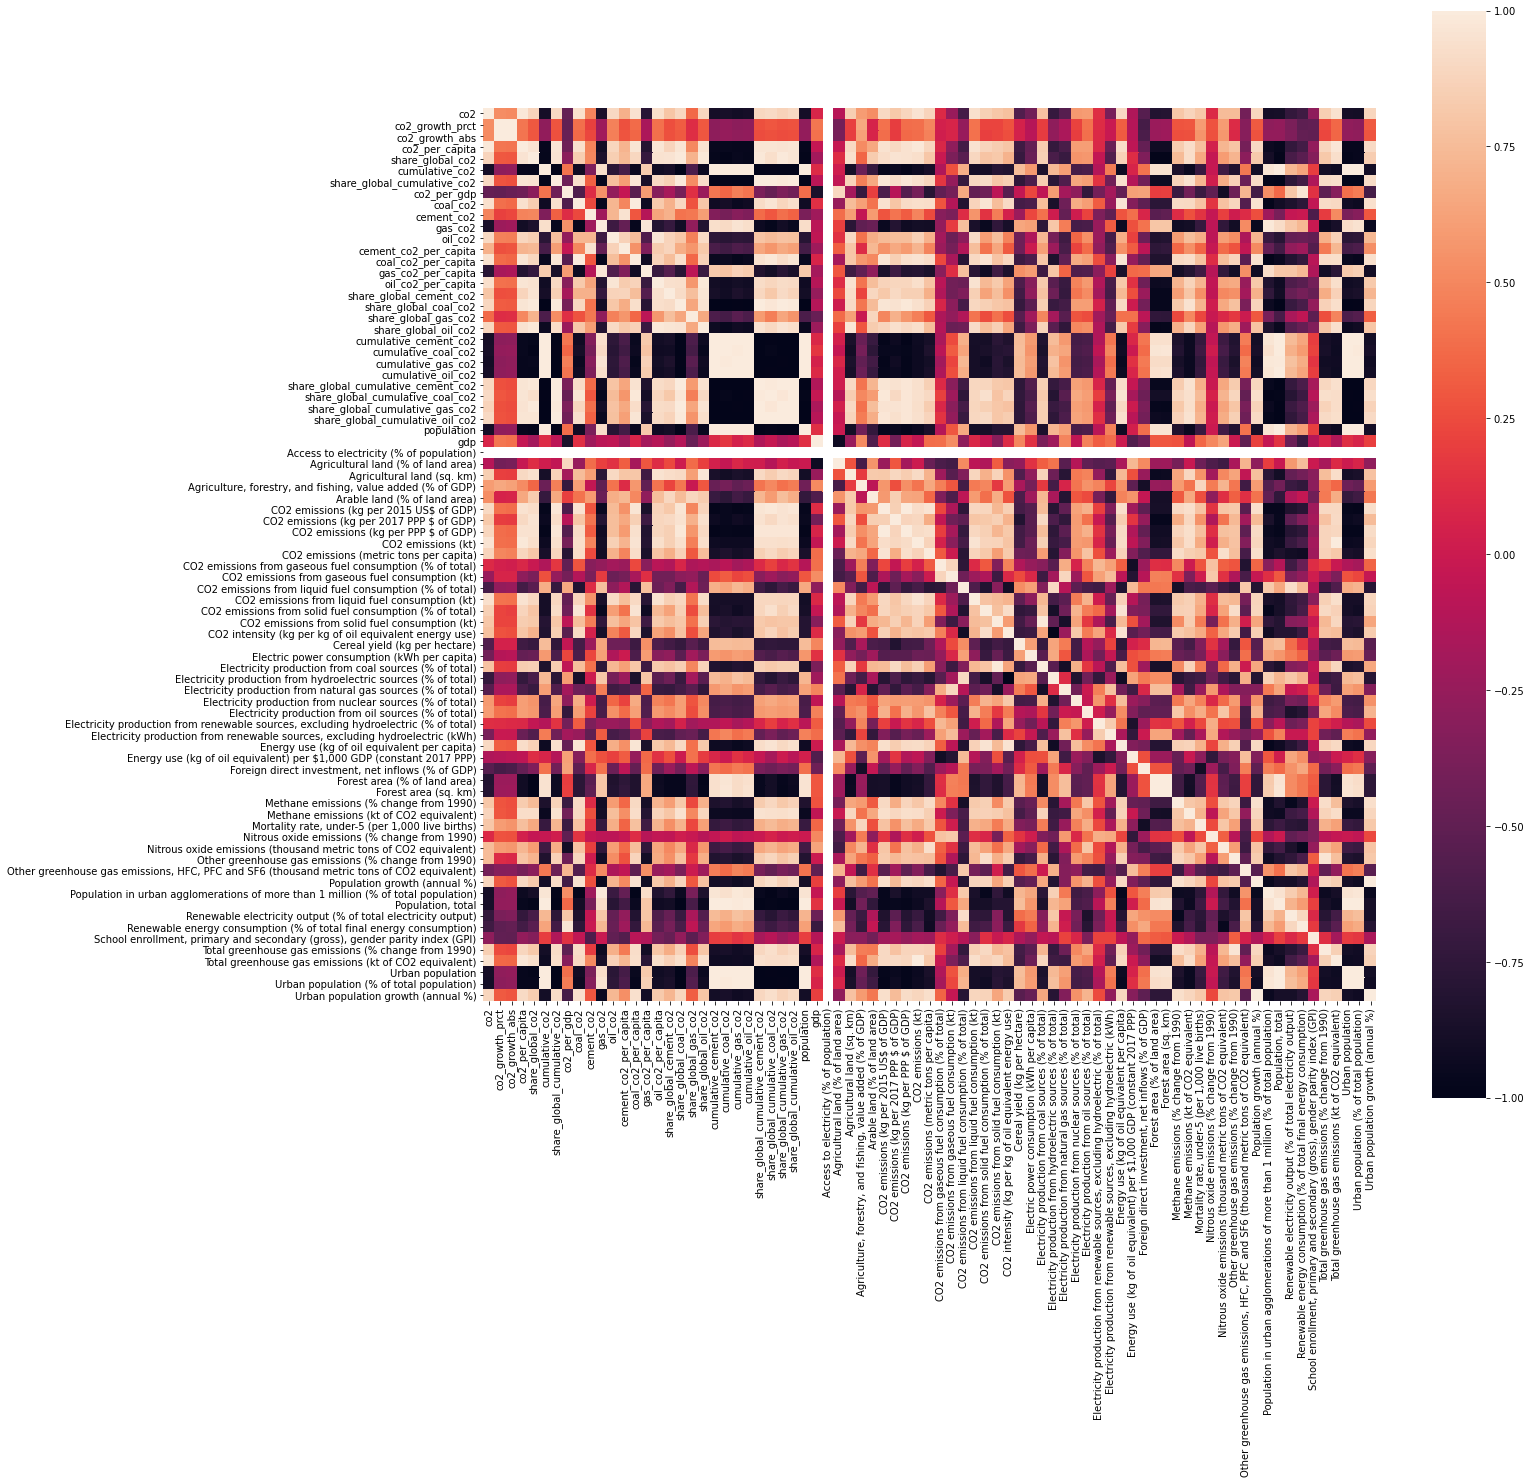

In [8]:
df_us_corr = df_us.iloc[:, 1:80].corr() # only numeric columns

plt.figure(figsize=(20, 20))
sns.heatmap(df_us_corr, square=True, vmin=-1, vmax=1, cmap='rocket')

<AxesSubplot:>

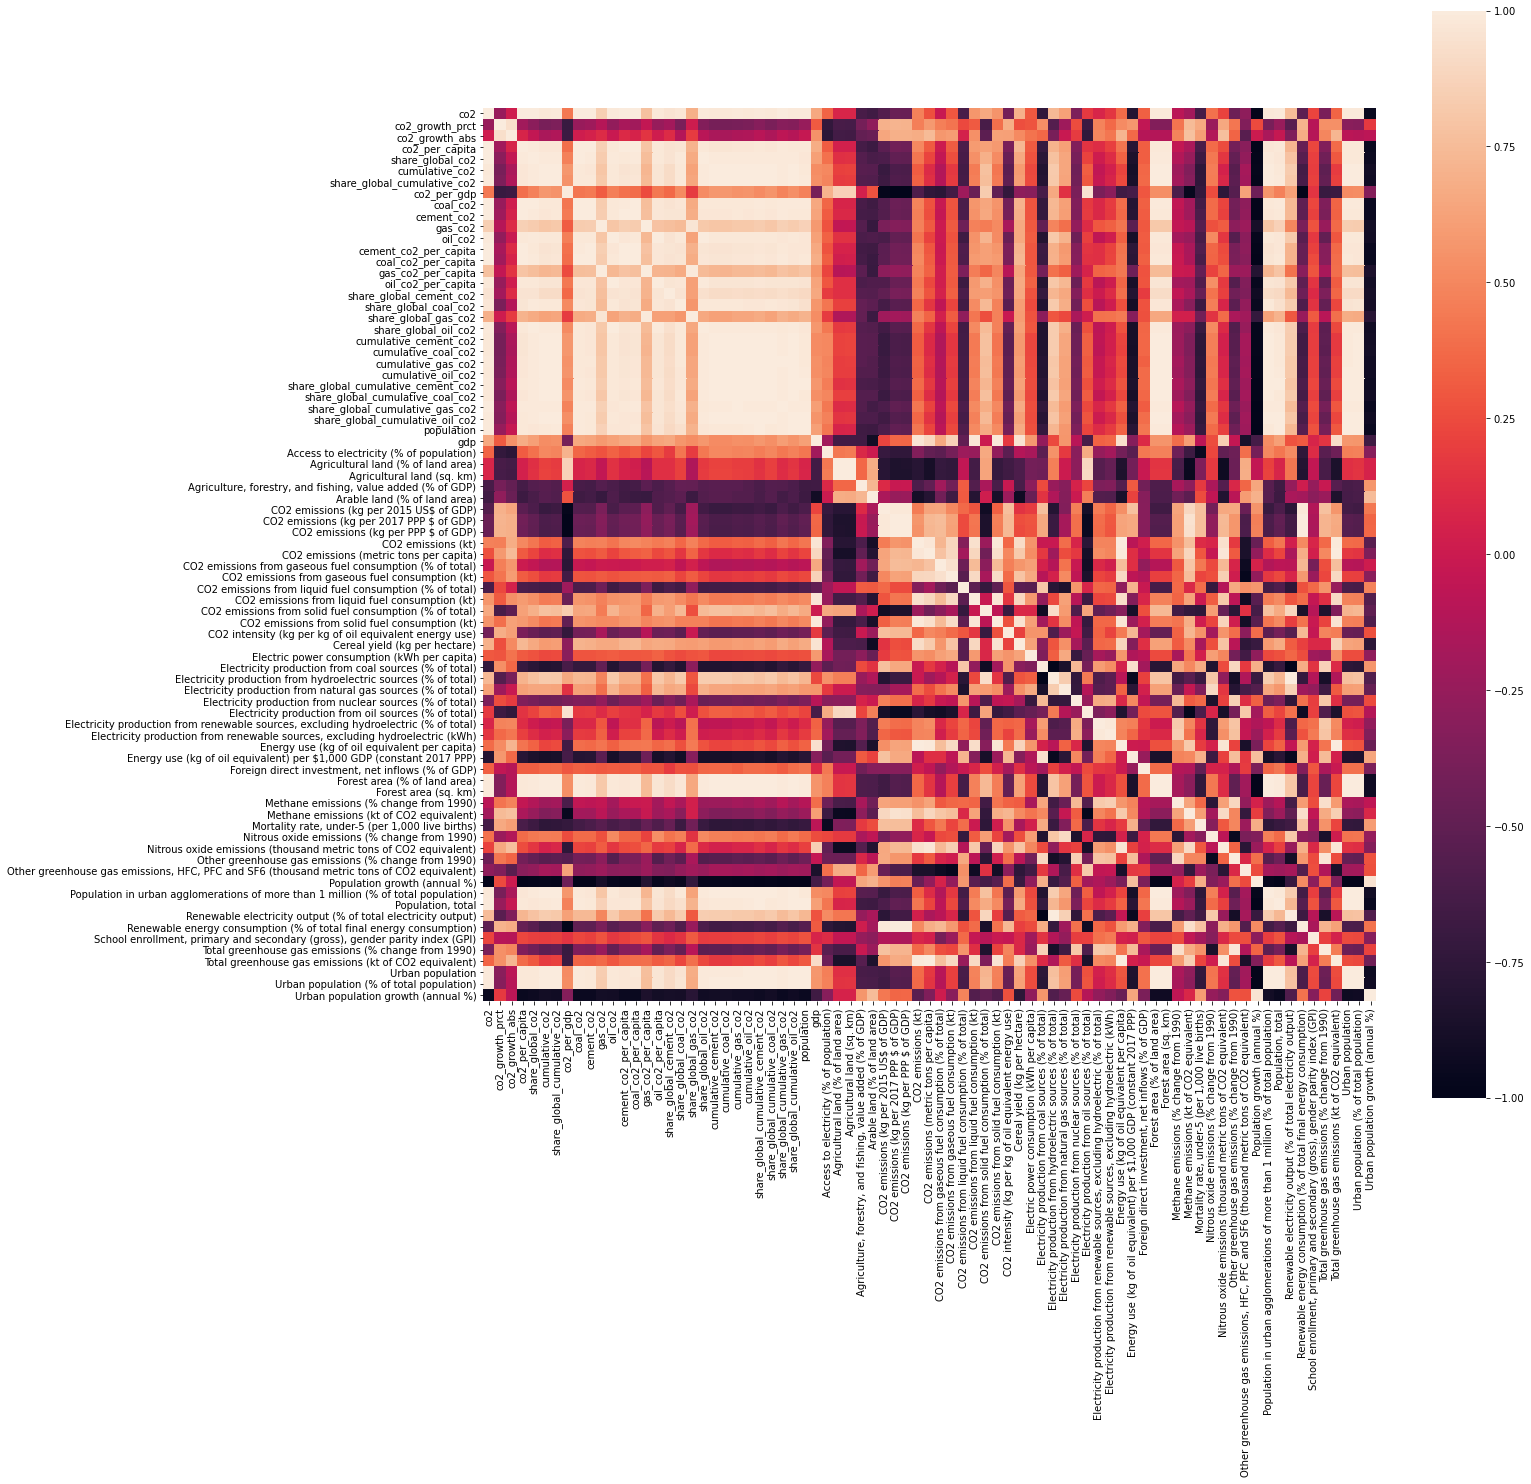

In [10]:
df_india_corr = df_india.iloc[:, 1:80].corr() # only numeric columns

plt.figure(figsize=(20, 20))
sns.heatmap(df_india_corr, square=True, vmin=-1, vmax=1, cmap='rocket')

In [9]:
shape = (50, 4460)

data = np.random.normal(size=shape)

data[:, 1000] += data[:, 2000]

df = pd.DataFrame(data)

c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[-4470:-4460])

2483  3703    0.649876
3703  2483    0.649876
2209  4320    0.653116
4320  2209    0.653116
2537  794     0.654881
794   2537    0.654881
117   2157    0.663942
2157  117     0.663942
2000  1000    0.744087
1000  2000    0.744087
dtype: float64


In [23]:
s = df_china_corr.unstack()
so = s.sort_values(kind="quicksort")
so.shape

(6241,)

In [18]:
so

CO2 emissions (kg per 2015 US$ of GDP)                                               co2_per_gdp                                                                           -0.997593
co2_per_gdp                                                                          CO2 emissions (kg per 2015 US$ of GDP)                                                -0.997593
Arable land (% of land area)                                                         CO2 emissions (kg per 2015 US$ of GDP)                                                -0.995460
CO2 emissions (kg per 2015 US$ of GDP)                                               Arable land (% of land area)                                                          -0.995460
Population in urban agglomerations of more than 1 million (% of total population)    Urban population growth (annual %)                                                    -0.992415
                                                                                               

In [47]:
# function to plot combined lineplots for given dataframes
def combined_lineplot(dfs, target_col):
    
    INDICATOR = 'country' # can be 'iso_code' or 'country'
    if len(dfs) == 0:
        return 0
    
    cols = ['year', f'{INDICATOR}', f'{target_col}']
    df_world = pd.DataFrame(columns=cols)
    for df in dfs:
        df_world = df_world.append(df[cols], ignore_index=True)
    
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=df_world, x='year', y=f'{target_col}', hue=f'{INDICATOR}')
    plt.title(f'{target_col}')

In [52]:
codebook = pd.read_csv('dataset/owid/owid-co2-codebook.csv')

# function to get the description of a column
def get_column_desc(column_name):
    col =  codebook[codebook['column']==column_name]
    if len(col) == 0:
        return 'the specified column does not exists'
    return str(col.iloc[0]['description'])

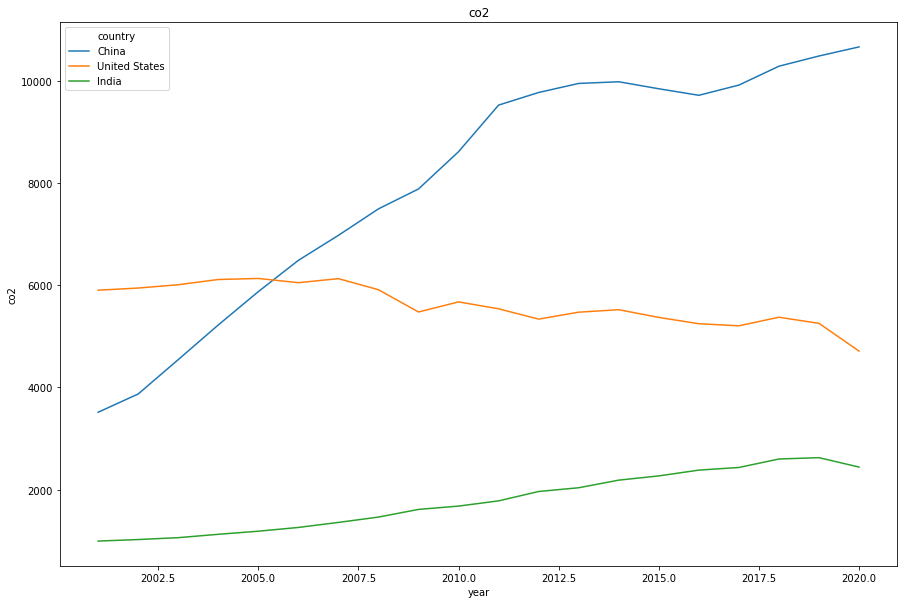

Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


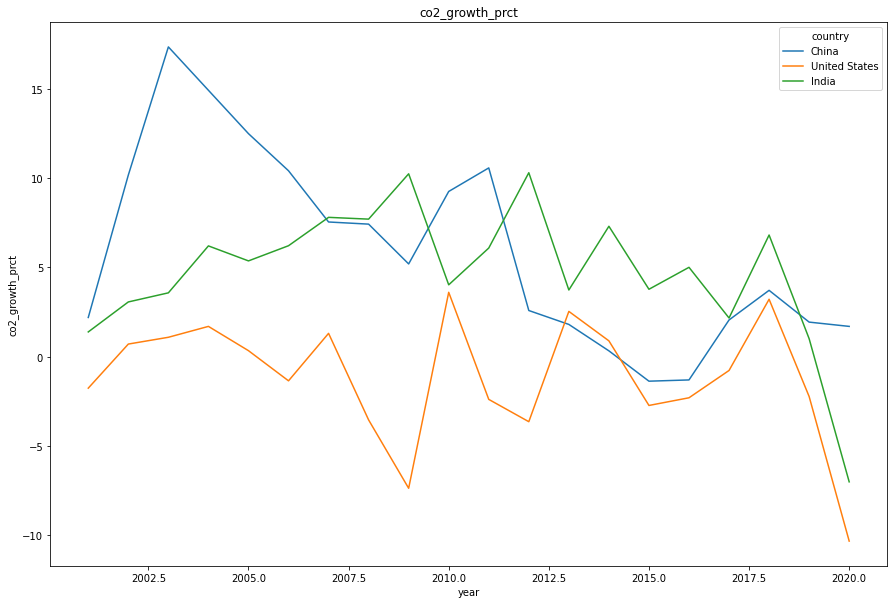

Annual percentage growth in production-based emissions of carbon dioxide (CO2). This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


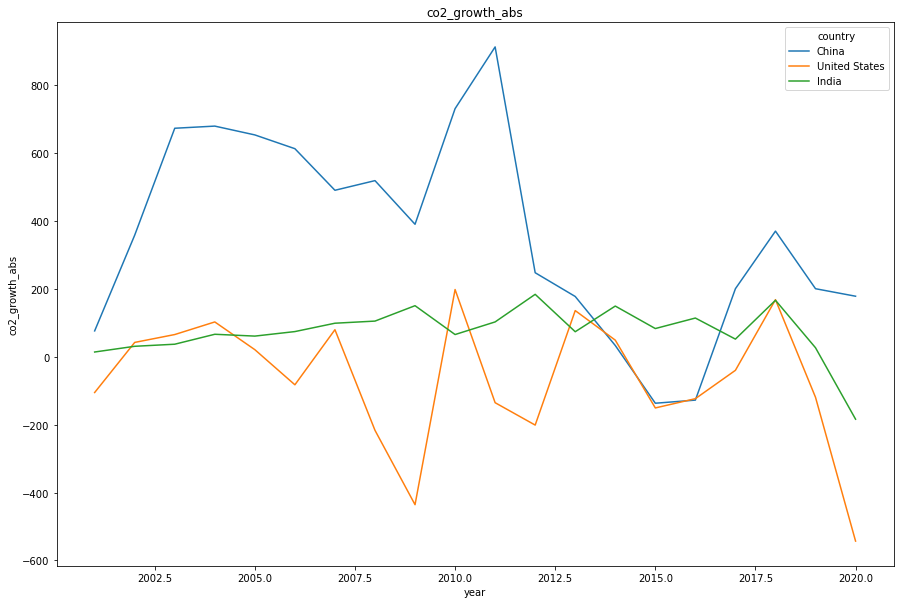

Annual growth in production-based emissions of carbon dioxide (CO2), measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


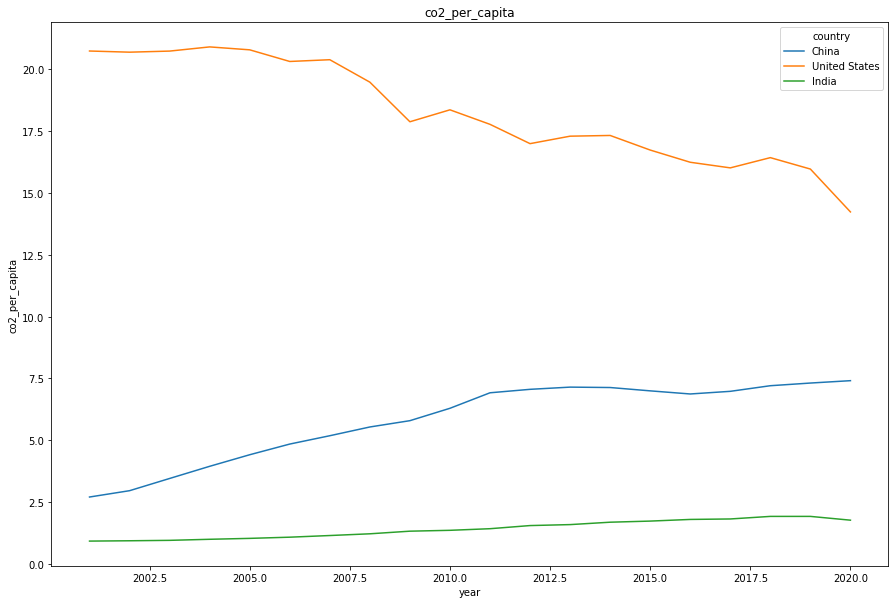

Annual production-based emissions of carbon dioxide (CO2), measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


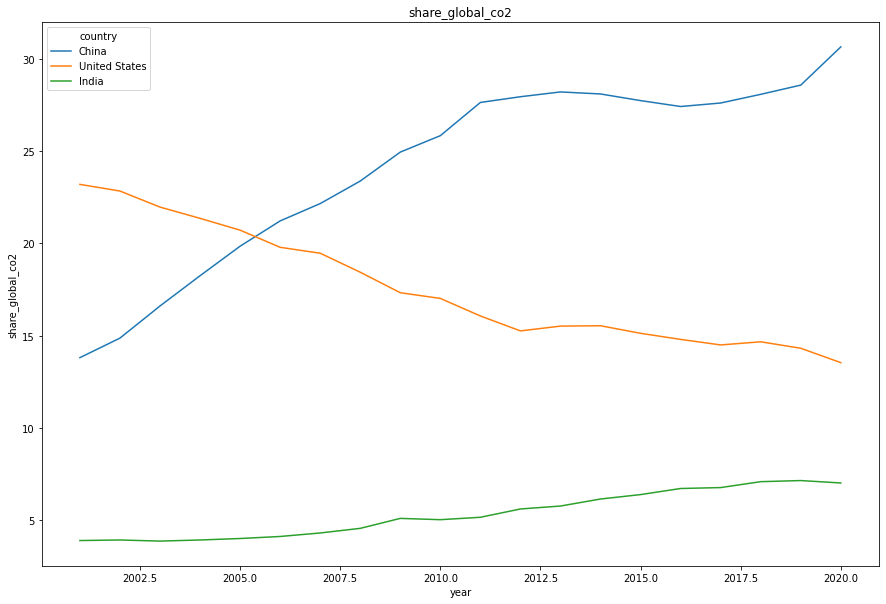

Annual production-based emissions of carbon dioxide (CO2), measured as a percentage of global production-based emissions of CO2 in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions has been calculated by Our World in Data using global CO2 emissions provided in the Global Carbon Budget dataset. Global emissions include all country emissions as well as emissions from international aviation and shipping.
*******************************************************************************************************************************


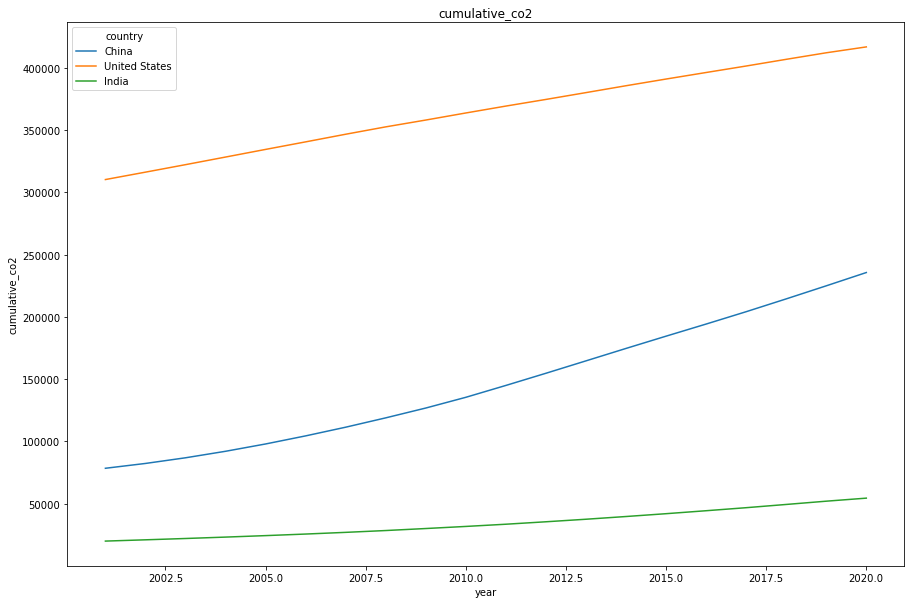

Cumulative production-based emissions of carbon dioxide (CO2) since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


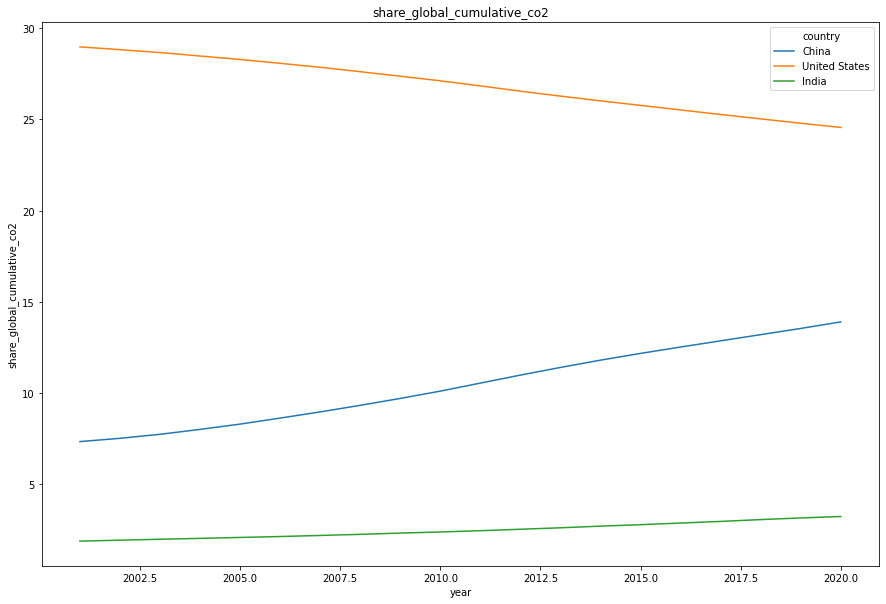

Cumulative production-based emissions of carbon dioxide (CO2) since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions has been calculated by Our World in Data using global CO2 emissions provided in the Global Carbon Budget dataset. Global emissions include all country emissions as well as emissions from international aviation and shipping.
*******************************************************************************************************************************


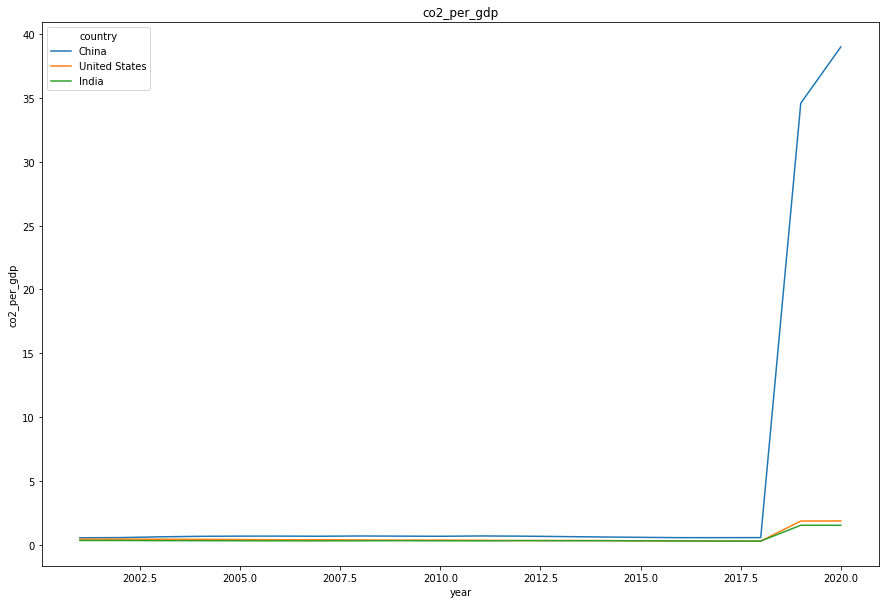

Annual production-based emissions of carbon dioxide (CO2), measured in kilograms per dollar of GDP (2011 international-$). Production-based emissions are based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


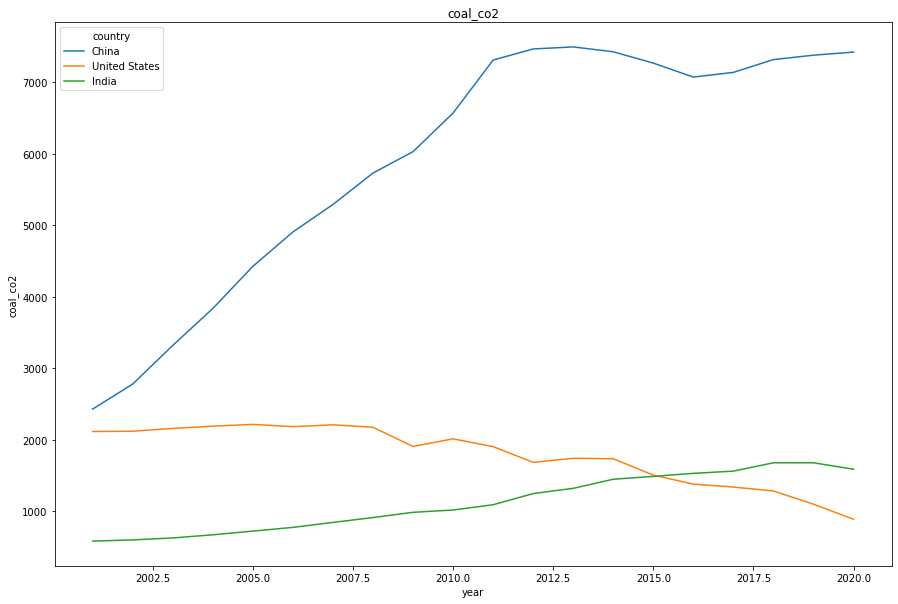

Annual production-based emissions of carbon dioxide (CO2) from coal, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


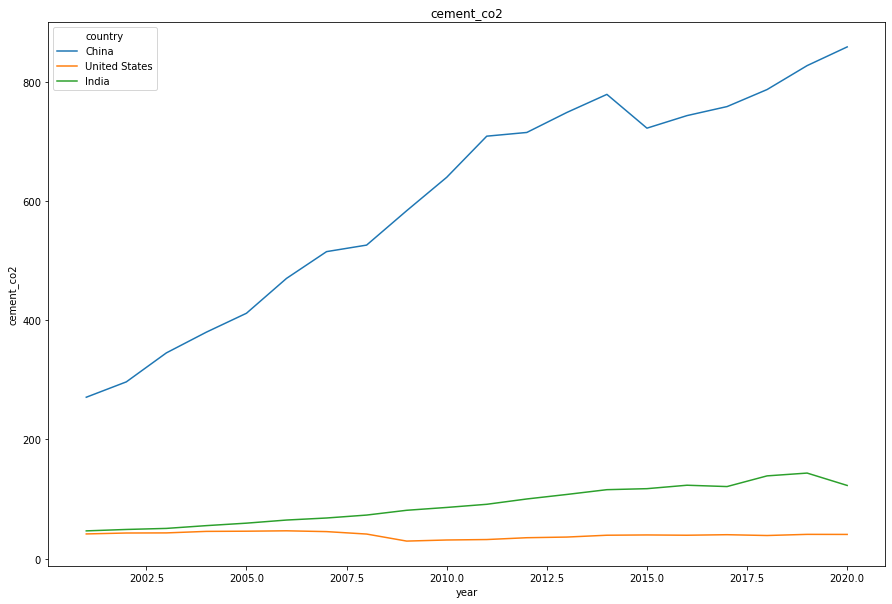

Annual production-based emissions of carbon dioxide (CO2) from cement, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


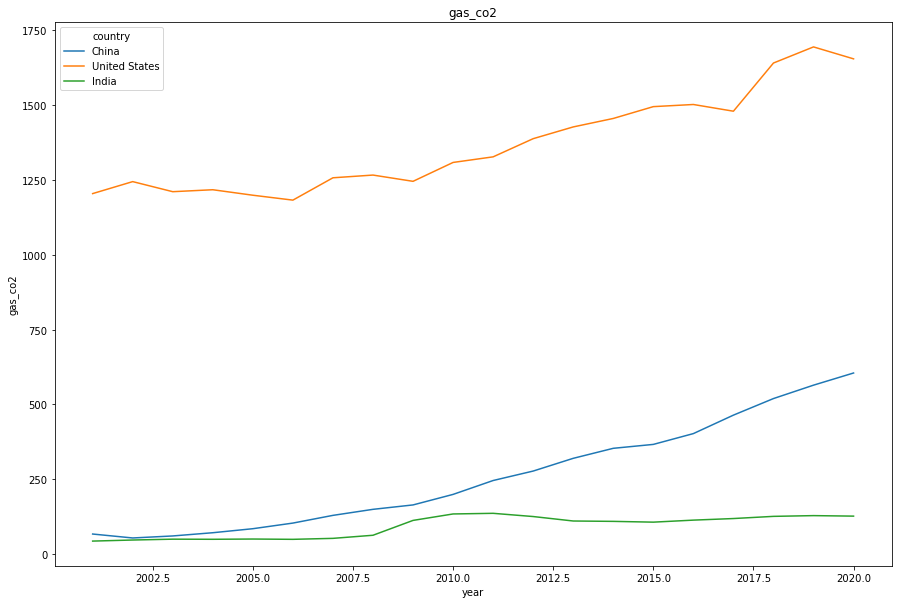

Annual production-based emissions of carbon dioxide (CO2) from gas, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


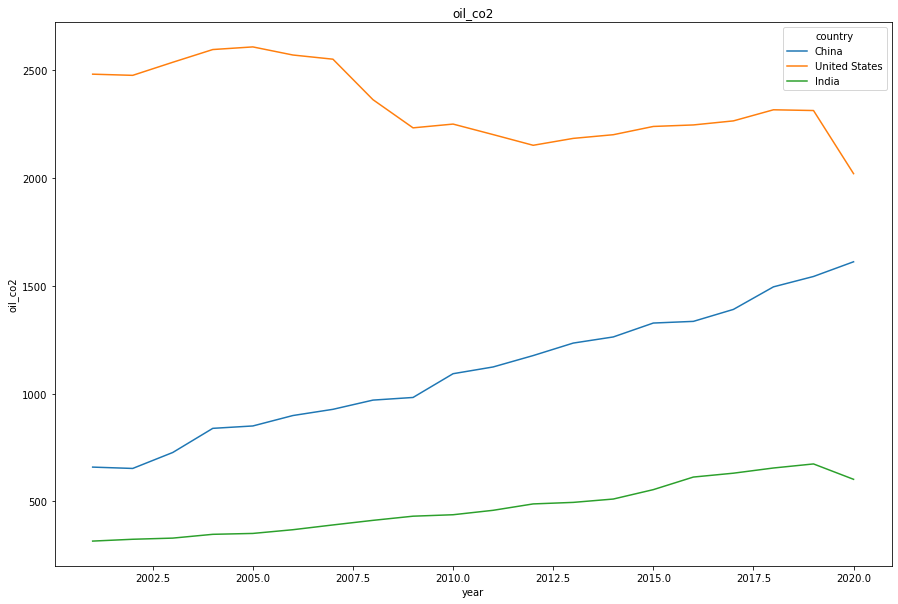

Annual production-based emissions of carbon dioxide (CO2) from oil, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


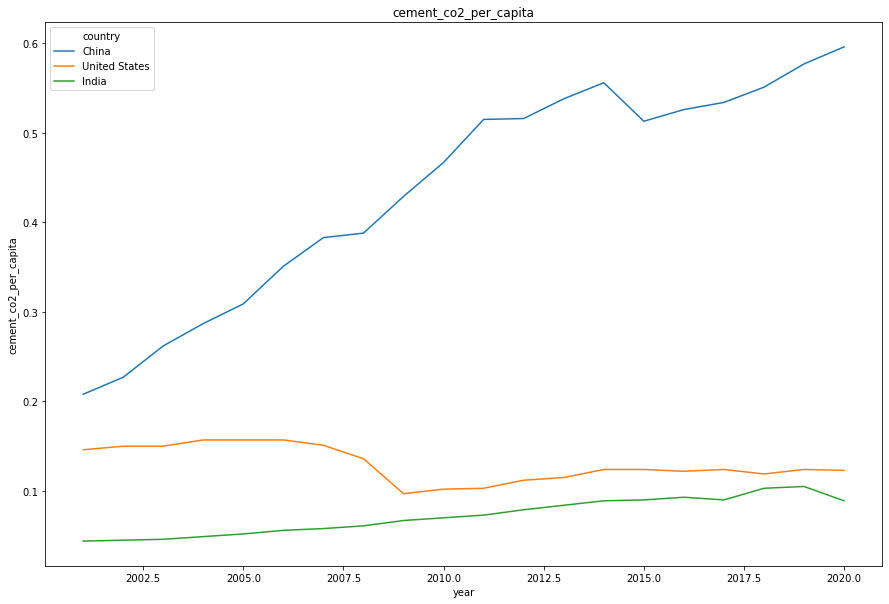

Annual production-based emissions of carbon dioxide (CO2) from cement, measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


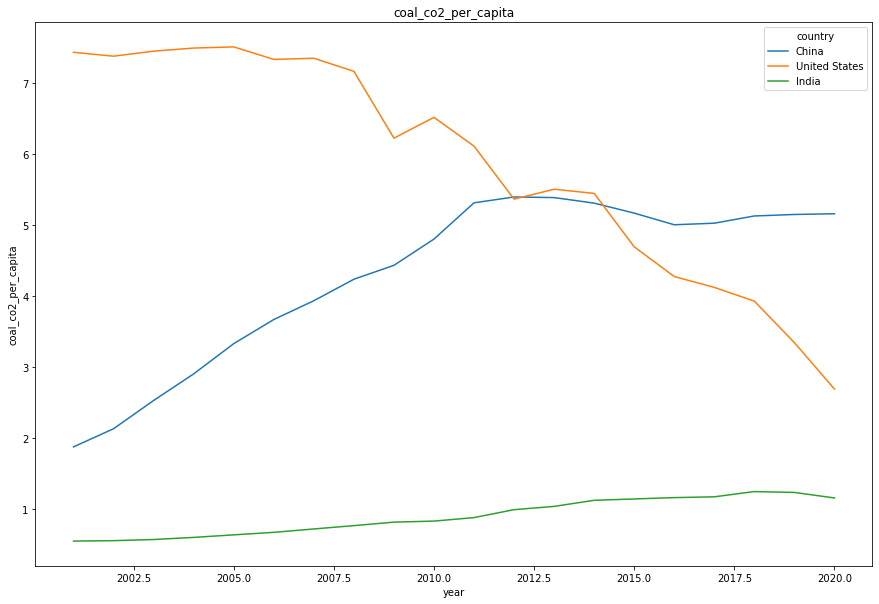

Annual production-based emissions of carbon dioxide (CO2) from coal, measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


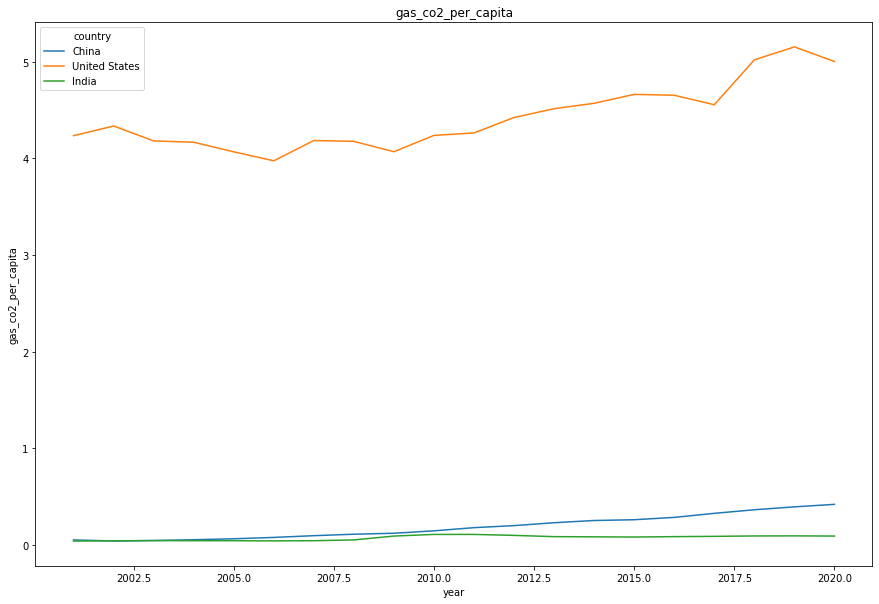

Annual production-based emissions of carbon dioxide (CO2) from gas, measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


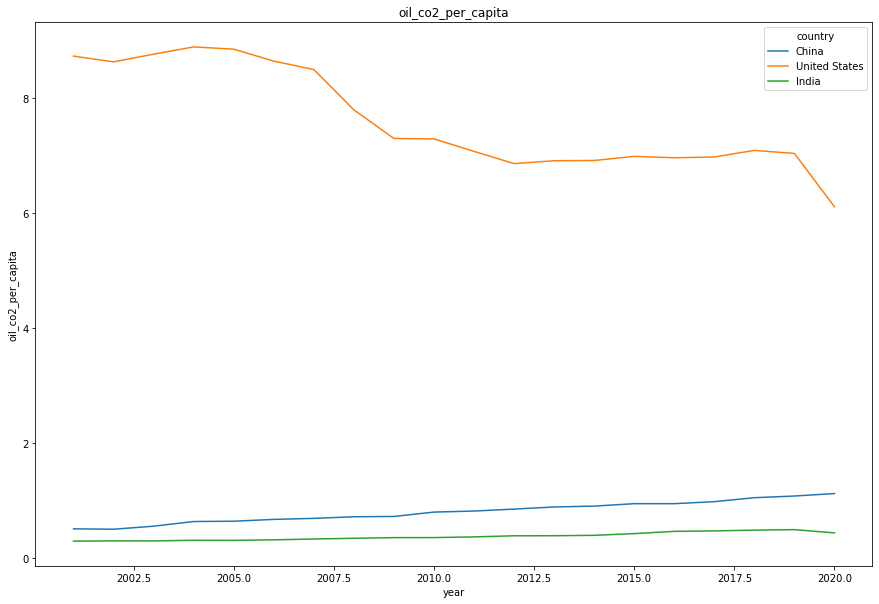

Annual production-based emissions of carbon dioxide (CO2) from oil, measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


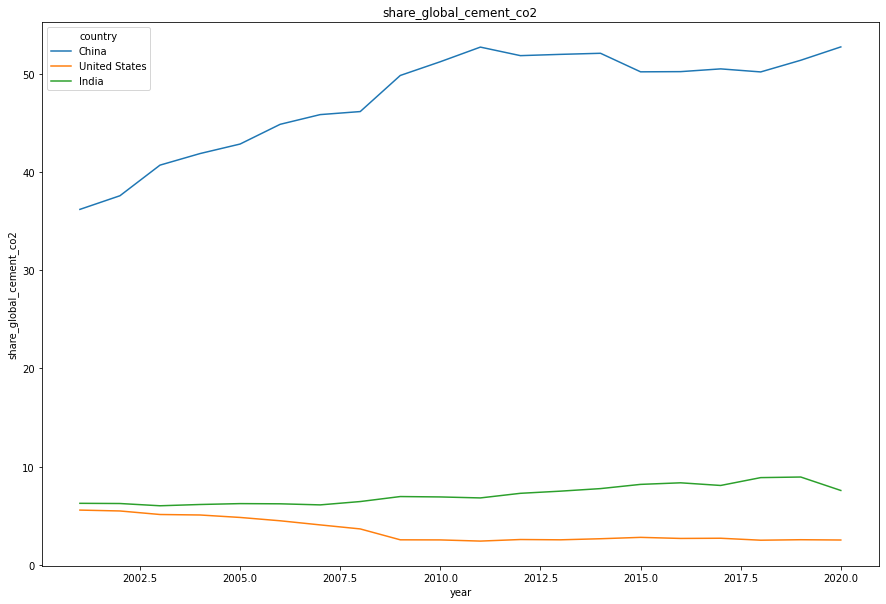

Annual production-based emissions of carbon dioxide (CO2) from cement, measured as a percentage of global production-based emissions of CO2 from cement in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from cement has been calculated by Our World in Data using global CO2 emissions from cement provided in the Global Carbon Budget dataset. Global cement emissions include all country emissions.
*******************************************************************************************************************************


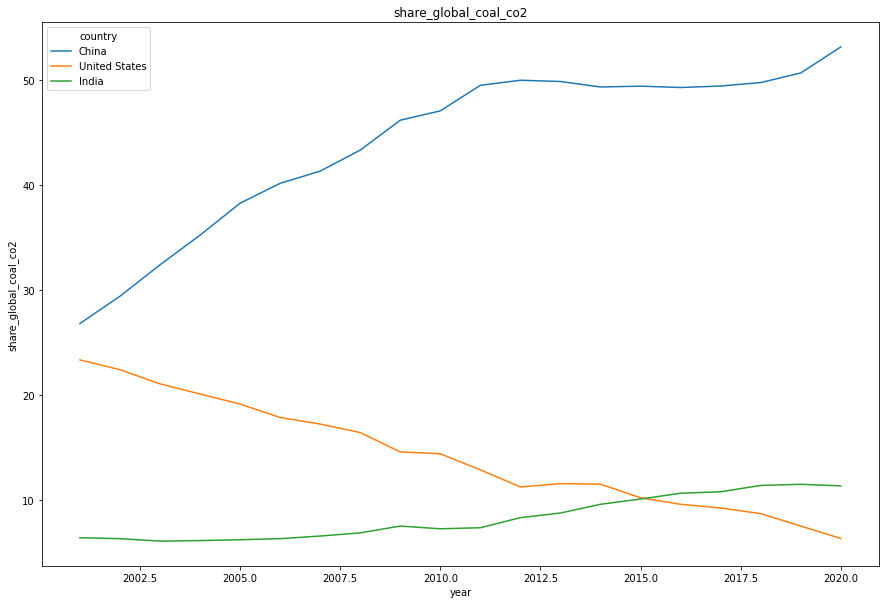

Annual production-based emissions of carbon dioxide (CO2) from coal, measured as a percentage of global production-based emissions of CO2 from coal in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from coal has been calculated by Our World in Data using global CO2 emissions from coal provided in the Global Carbon Budget dataset. Global coal emissions include all country emissions.
*******************************************************************************************************************************


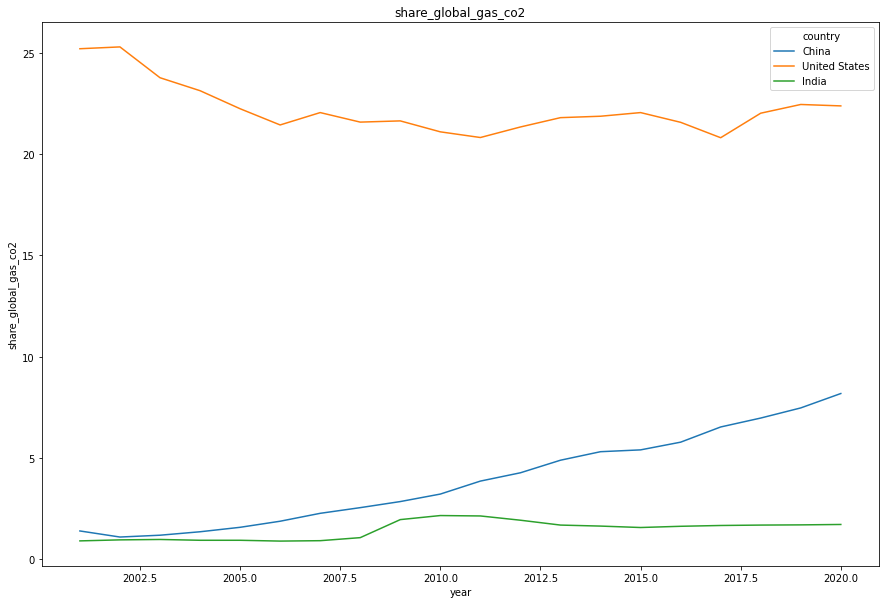

Annual production-based emissions of carbon dioxide (CO2) from gas, measured as a percentage of global production-based emissions of CO2 from gas in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from gas has been calculated by Our World in Data using global CO2 emissions from gas provided in the Global Carbon Budget dataset. Global gas emissions include all country emissions as well as emissions from international aviation and shipping.
*******************************************************************************************************************************


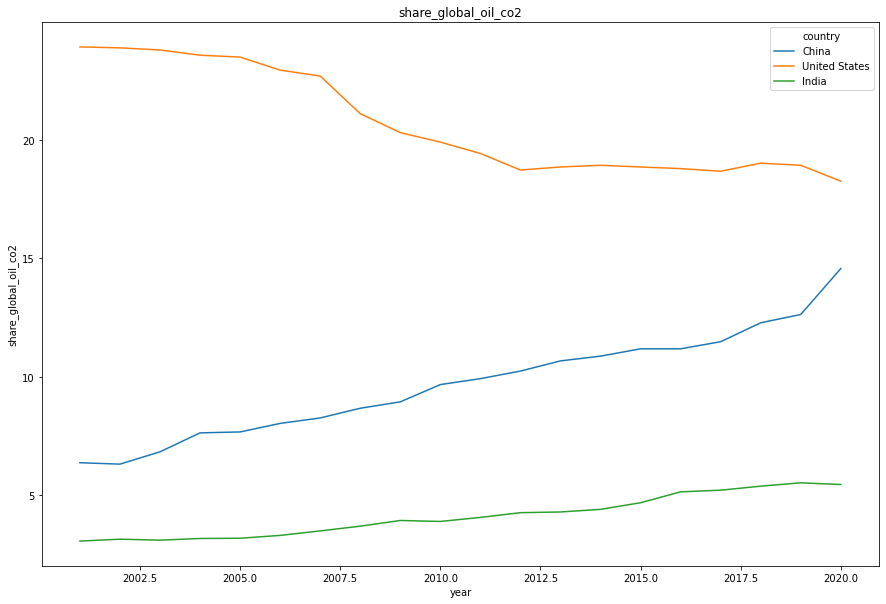

Annual production-based emissions of carbon dioxide (CO2) from oil, measured as a percentage of global production-based emissions of CO2 from oil in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from oil has been calculated by Our World in Data using global CO2 emissions from oil provided in the Global Carbon Budget dataset. Global oil emissions include all country emissions as well as emissions from international aviation and shipping.
*******************************************************************************************************************************


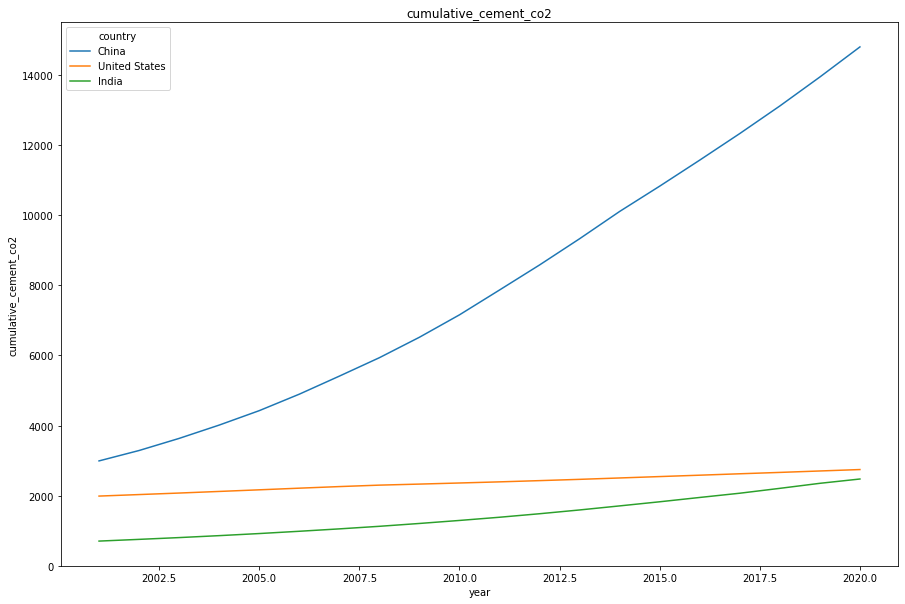

Cumulative production-based emissions of carbon dioxide (CO2) from cement since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


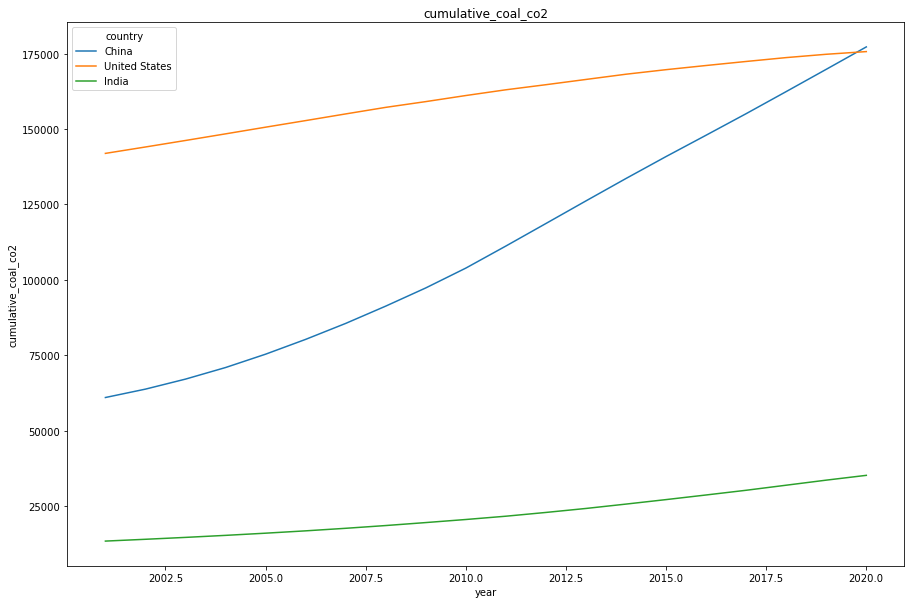

Cumulative production-based emissions of carbon dioxide (CO2) from coal since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


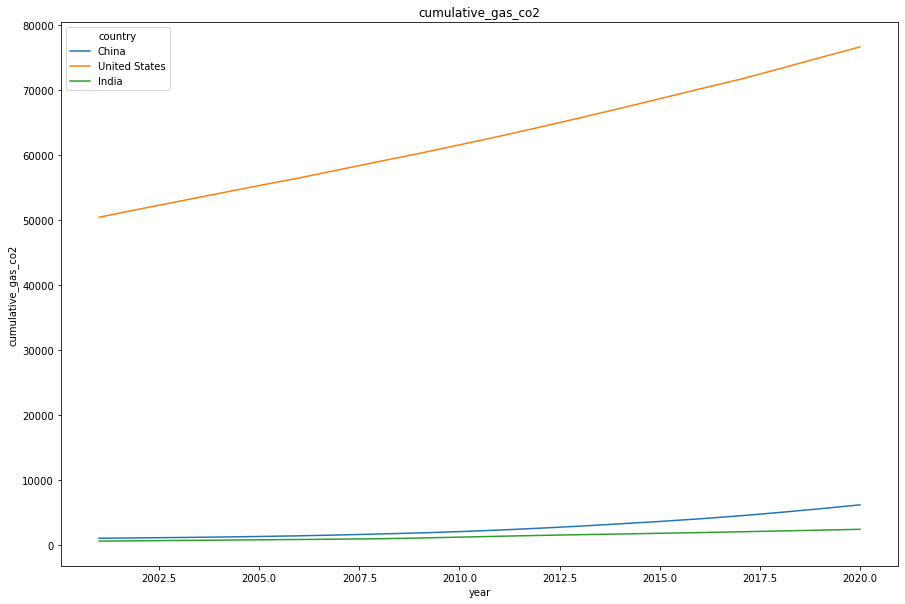

Cumulative production-based emissions of carbon dioxide (CO2) from gas since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


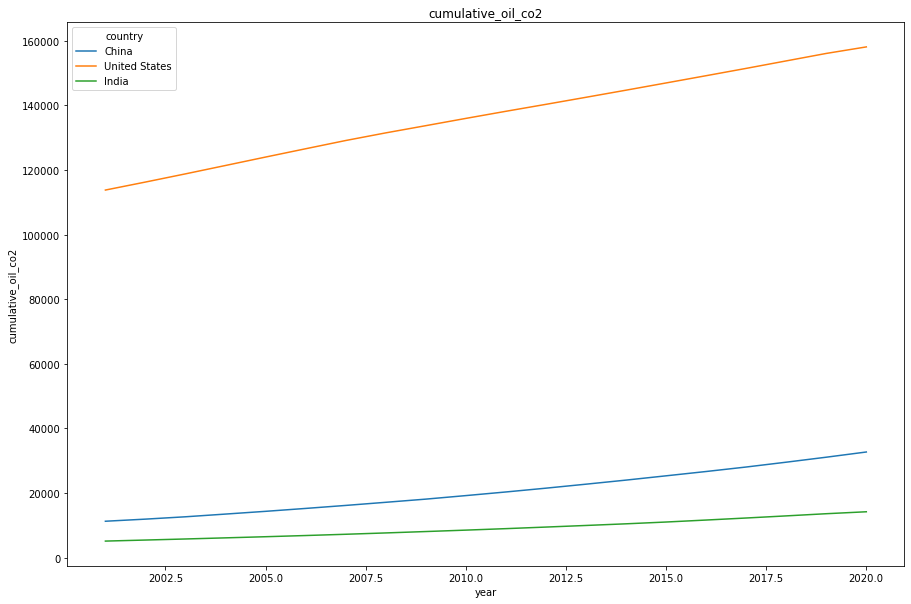

Cumulative production-based emissions of carbon dioxide (CO2) from oil since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*******************************************************************************************************************************


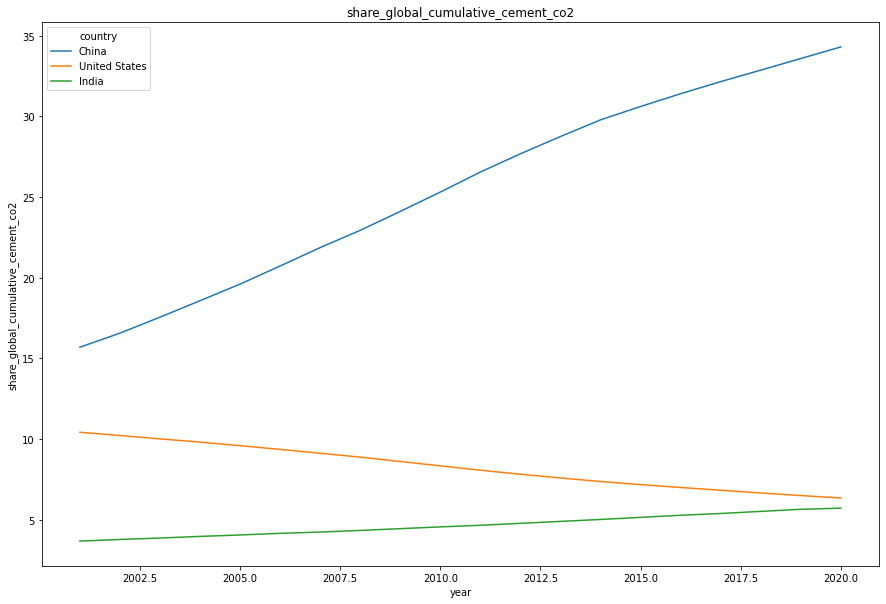

Cumulative production-based emissions of carbon dioxide (CO2) from cement since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 from cement since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from cement has been calculated by Our World in Data using global CO2 emissions from cement provided in the Global Carbon Budget dataset. Global cement emissions include all country emissions.
*******************************************************************************************************************************


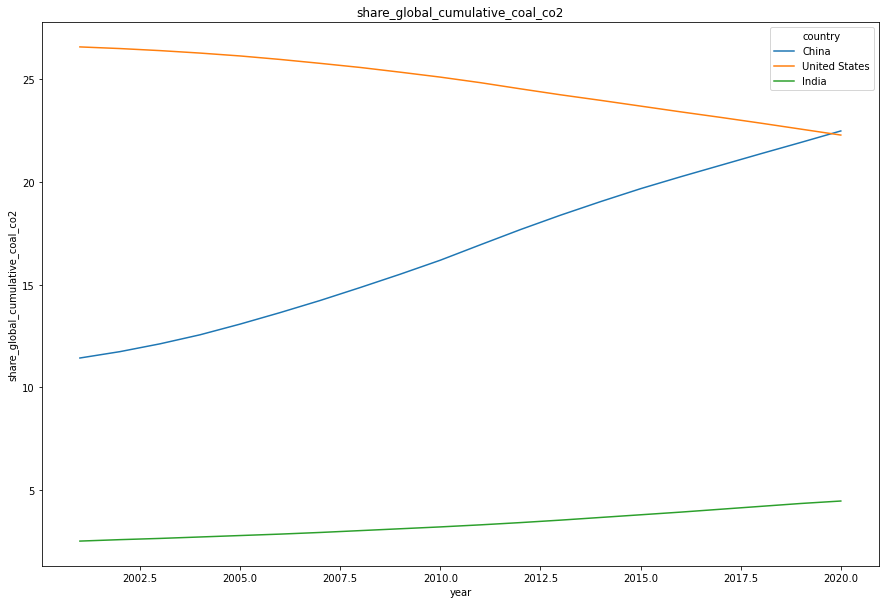

Cumulative production-based emissions of carbon dioxide (CO2) from coal since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 from coal since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from coal has been calculated by Our World in Data using global CO2 emissions from coal provided in the Global Carbon Budget dataset. Global coal emissions include all country emissions.
*******************************************************************************************************************************


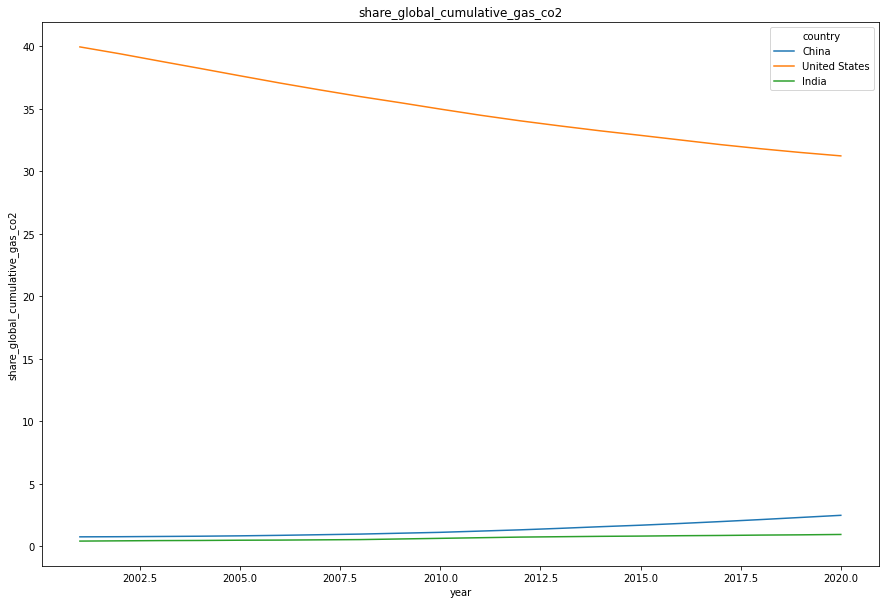

Cumulative production-based emissions of carbon dioxide (CO2) from gas since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 from gas since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from gas has been calculated by Our World in Data using global CO2 emissions from gas provided in the Global Carbon Budget dataset. Global gas emissions include all country emissions.
*******************************************************************************************************************************


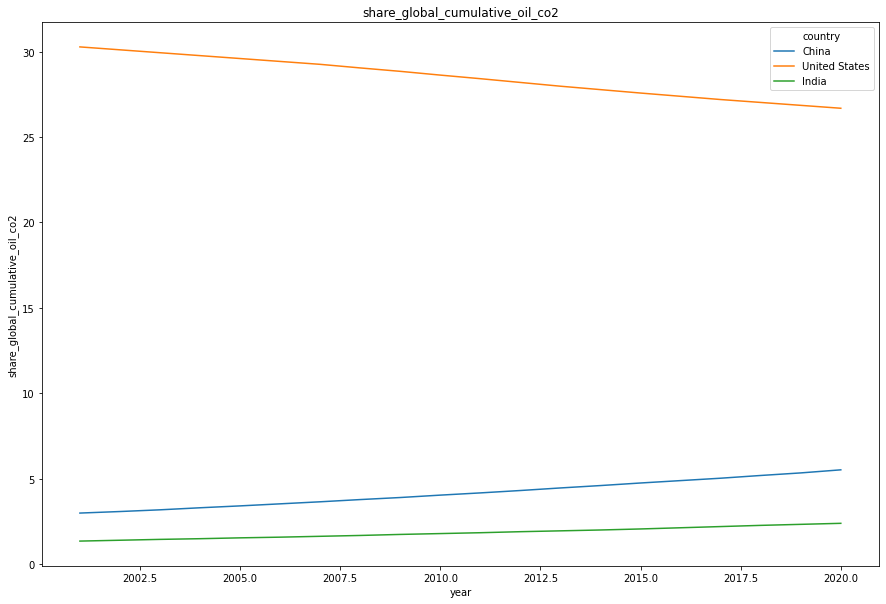

Cumulative production-based emissions of carbon dioxide (CO2) from oil since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 from oil since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from oil has been calculated by Our World in Data using global CO2 emissions from oil provided in the Global Carbon Budget dataset. Global oil emissions include all country emissions as well as emissions from international aviation and shipping.
*******************************************************************************************************************************


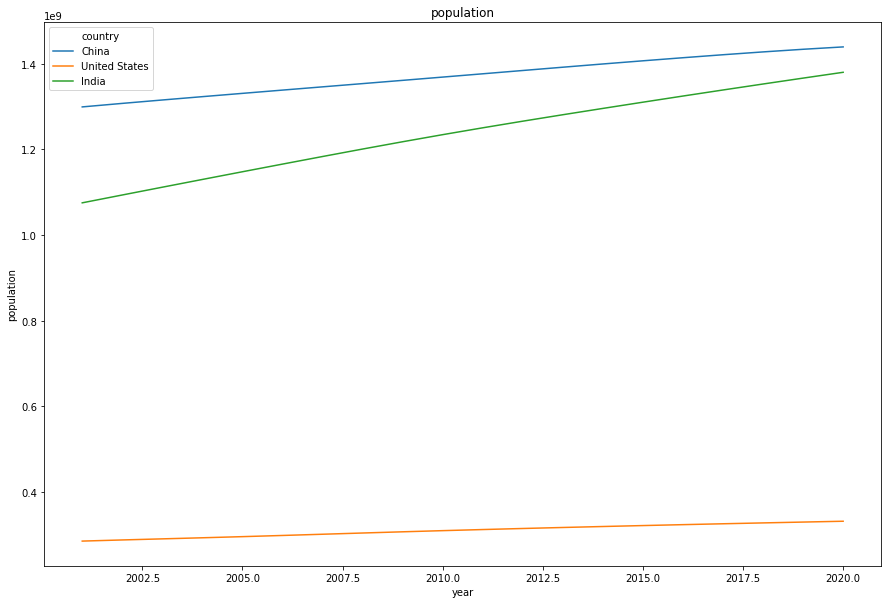

Population by country, available from 1800 to 2021 based on Gapminder data, HYDE, and UN Population Division (2019) estimates.
*******************************************************************************************************************************


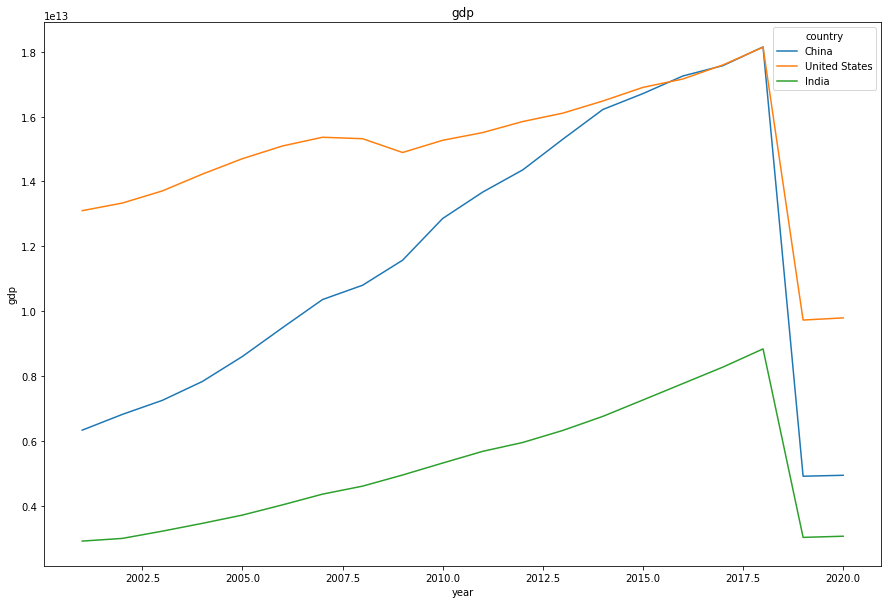

Gross domestic product measured in international-$ using 2011 prices to adjust for price changes over time (inflation) and price differences between countries. Calculated by multiplying GDP per capita with population.
*******************************************************************************************************************************


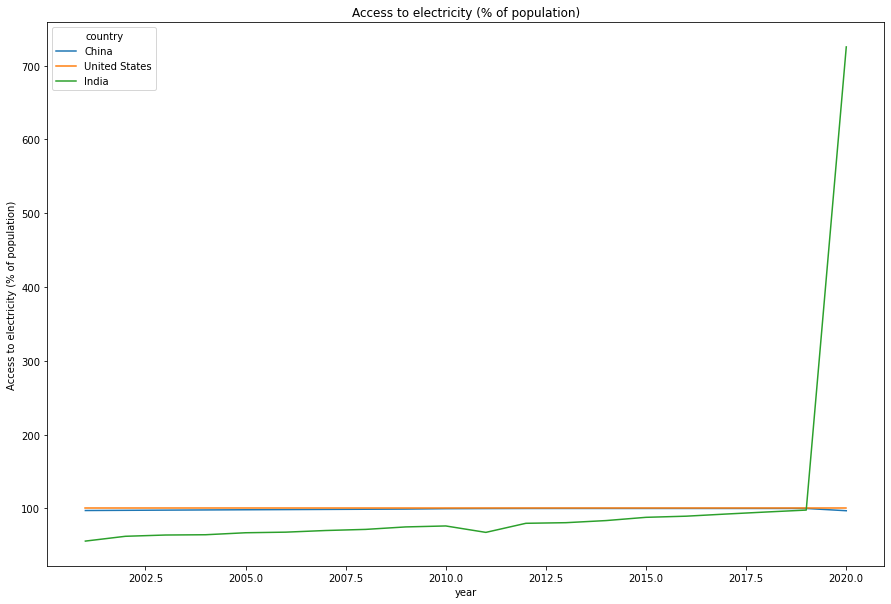

the specified column does not exists
*******************************************************************************************************************************


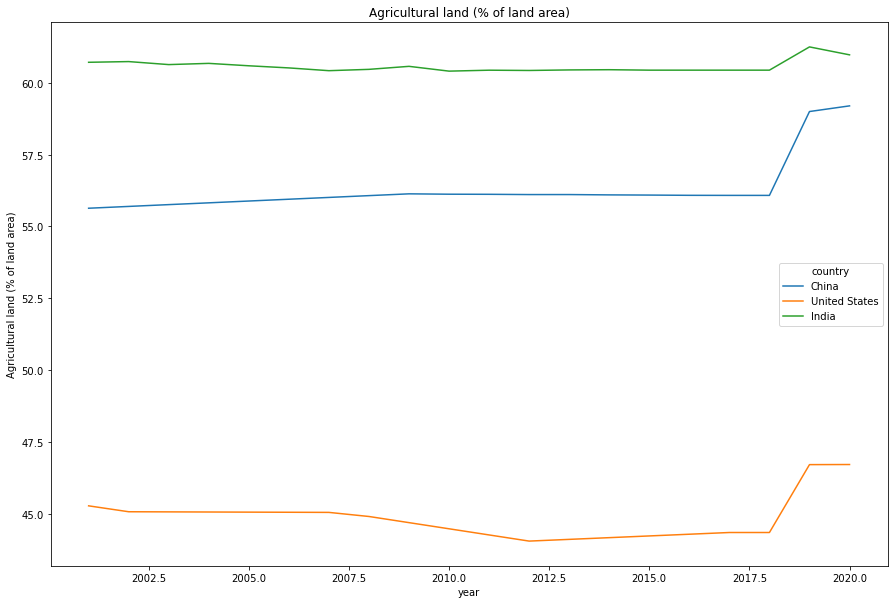

the specified column does not exists
*******************************************************************************************************************************


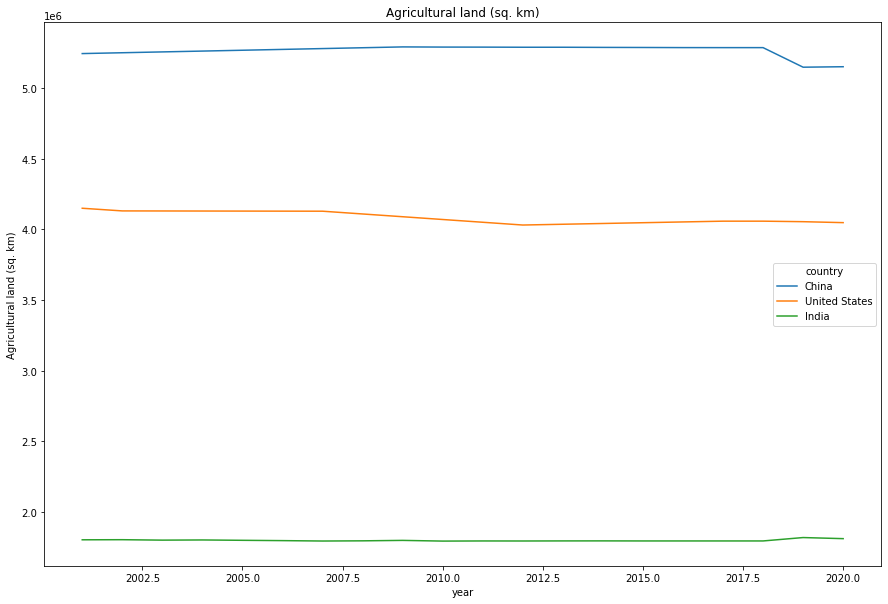

the specified column does not exists
*******************************************************************************************************************************


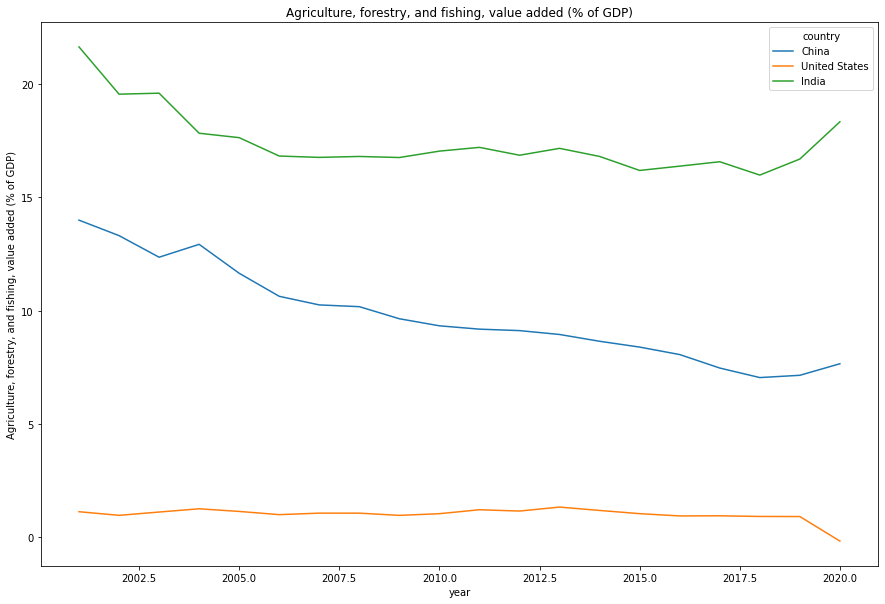

the specified column does not exists
*******************************************************************************************************************************


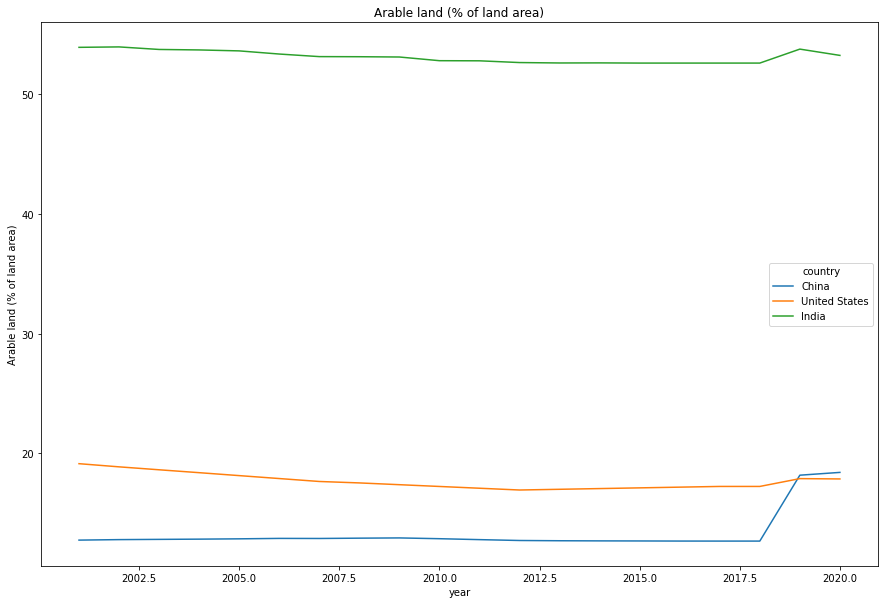

the specified column does not exists
*******************************************************************************************************************************


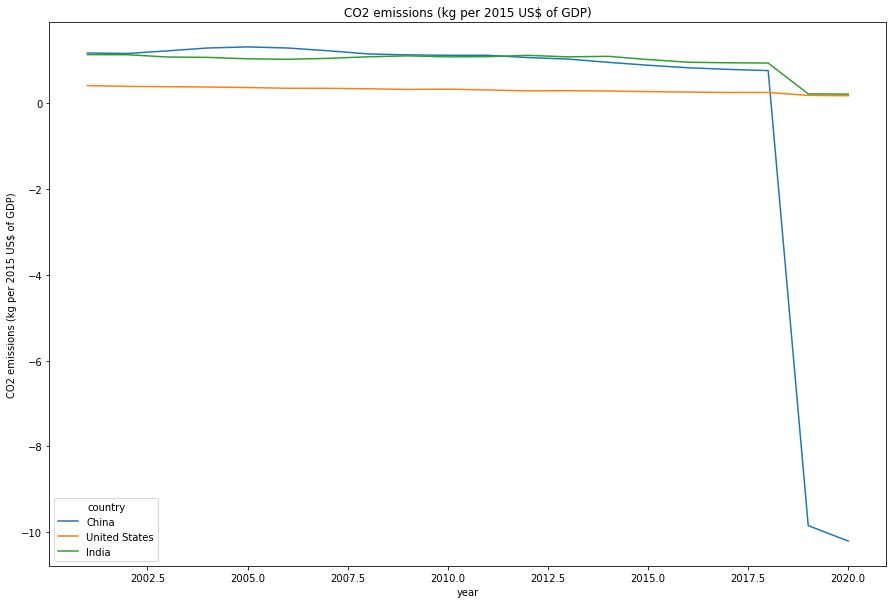

the specified column does not exists
*******************************************************************************************************************************


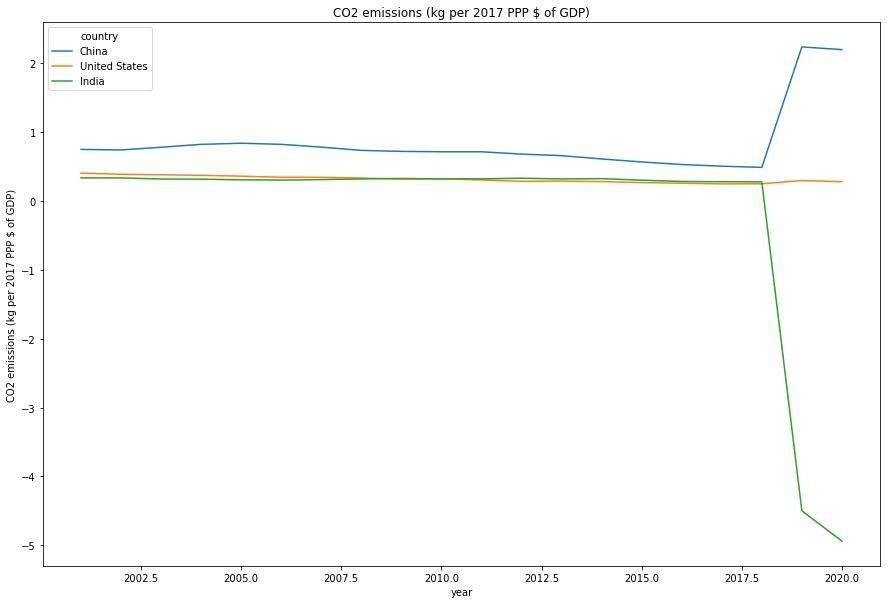

the specified column does not exists
*******************************************************************************************************************************


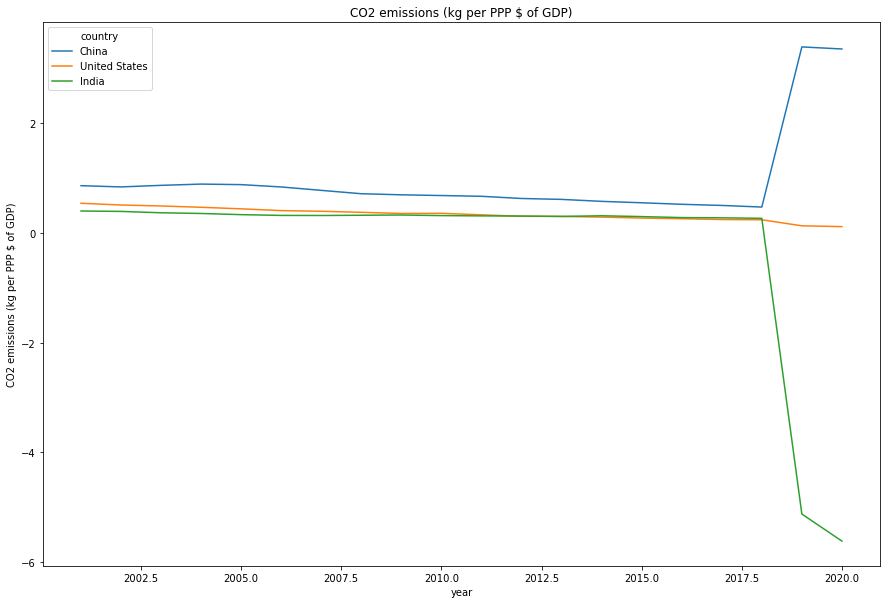

the specified column does not exists
*******************************************************************************************************************************


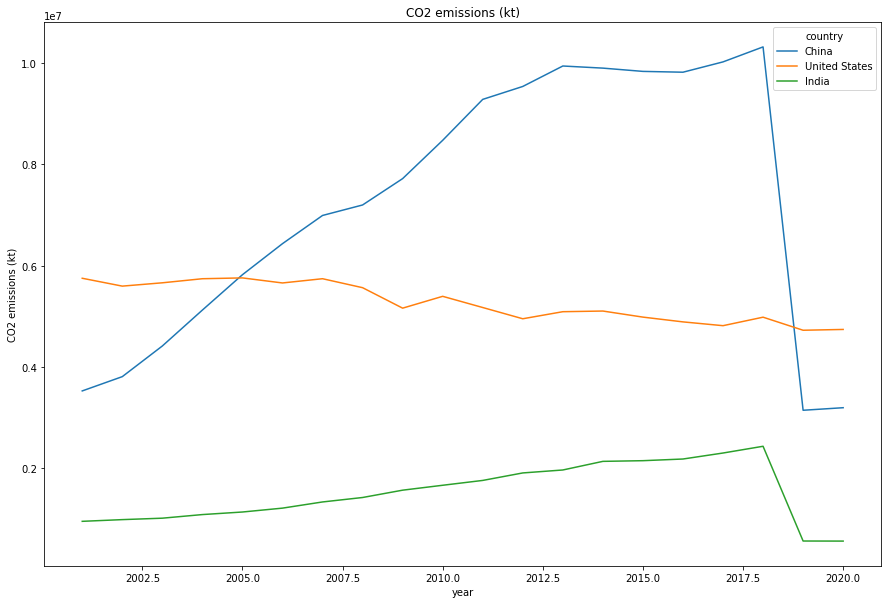

the specified column does not exists
*******************************************************************************************************************************


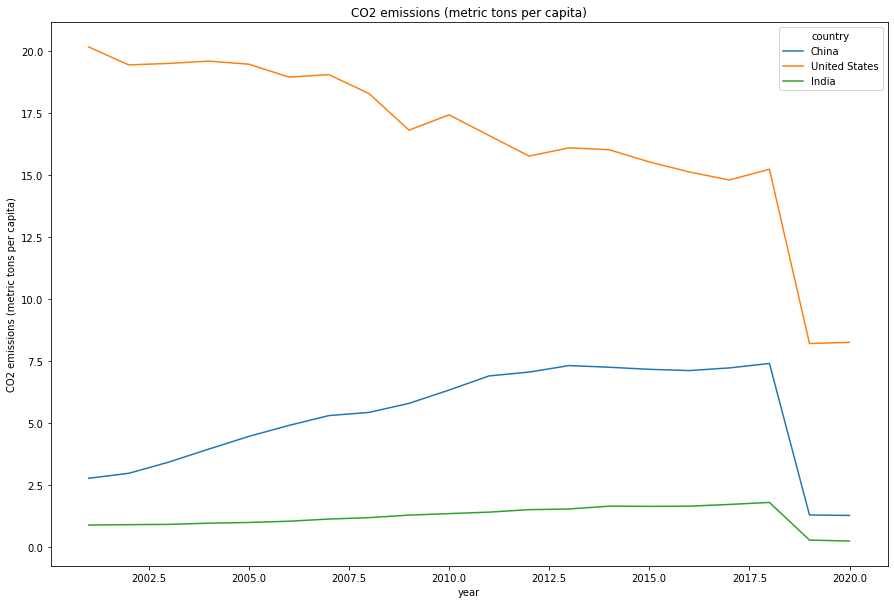

the specified column does not exists
*******************************************************************************************************************************


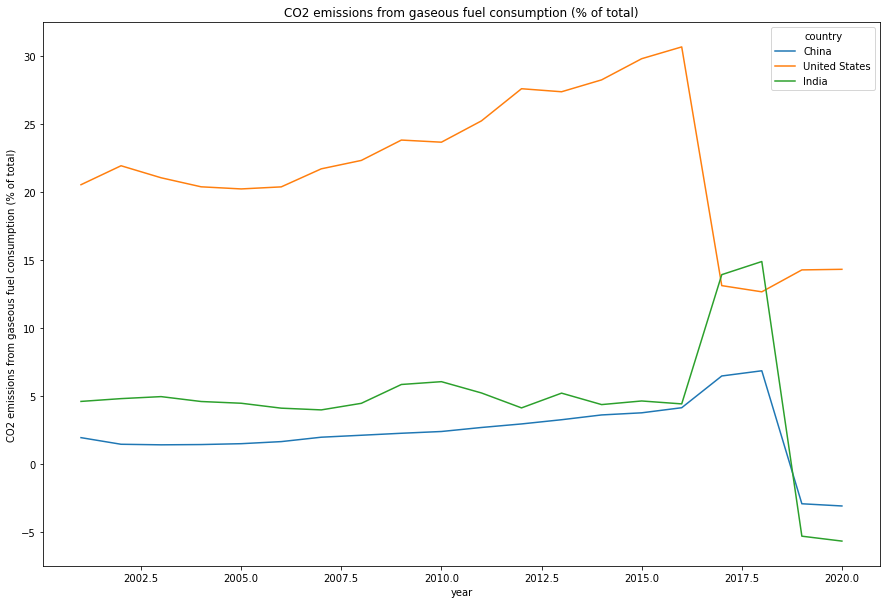

the specified column does not exists
*******************************************************************************************************************************


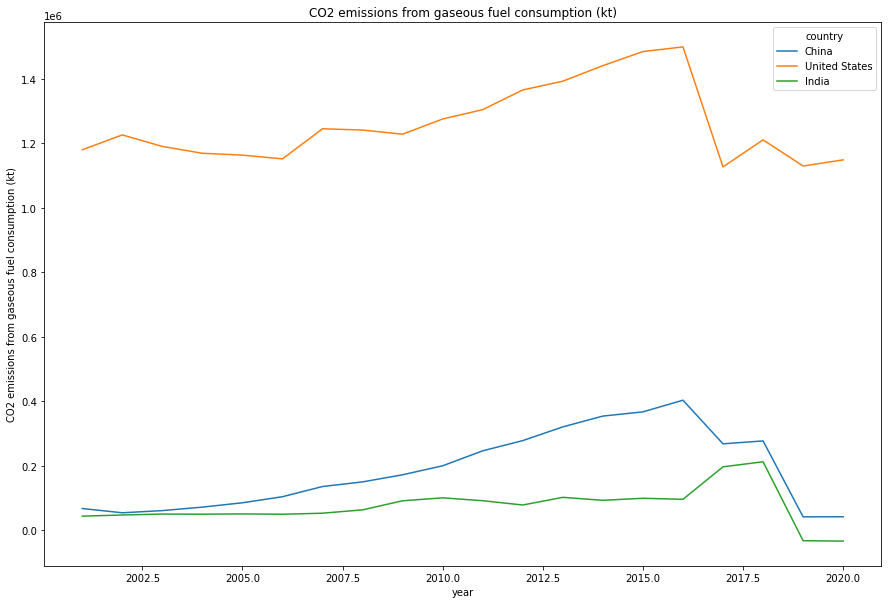

the specified column does not exists
*******************************************************************************************************************************


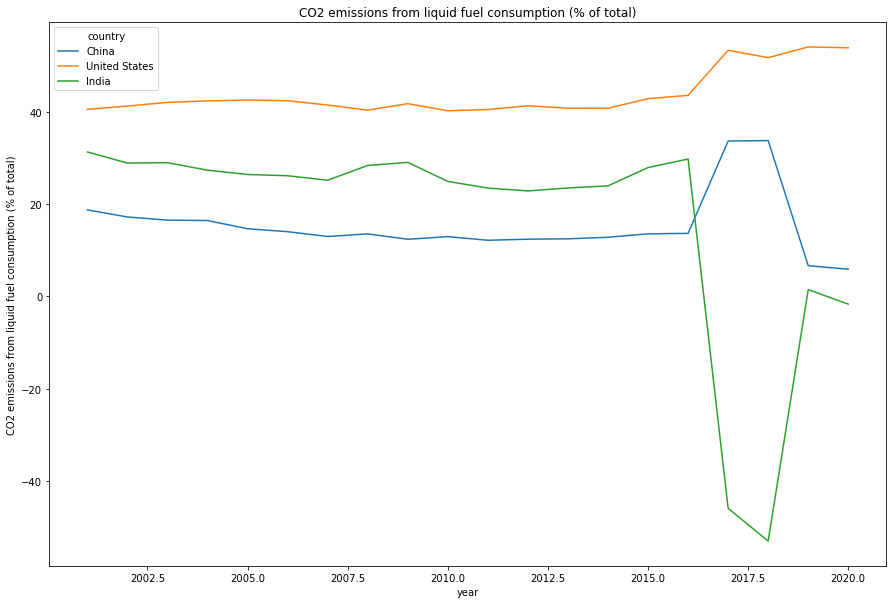

the specified column does not exists
*******************************************************************************************************************************


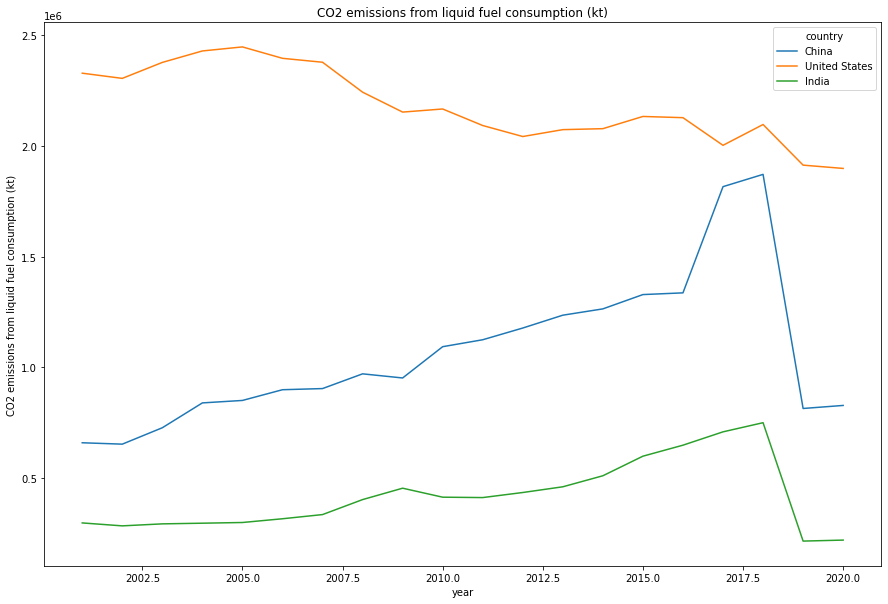

the specified column does not exists
*******************************************************************************************************************************


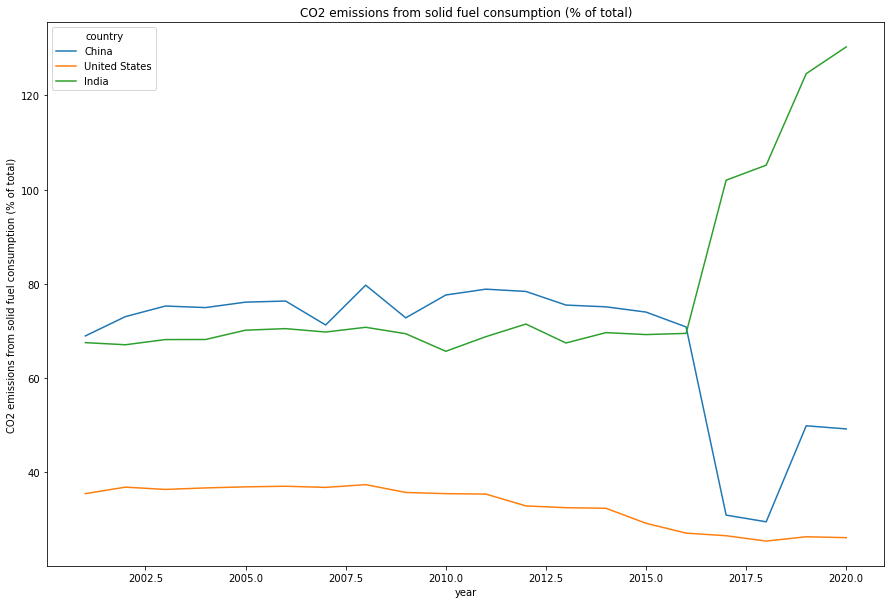

the specified column does not exists
*******************************************************************************************************************************


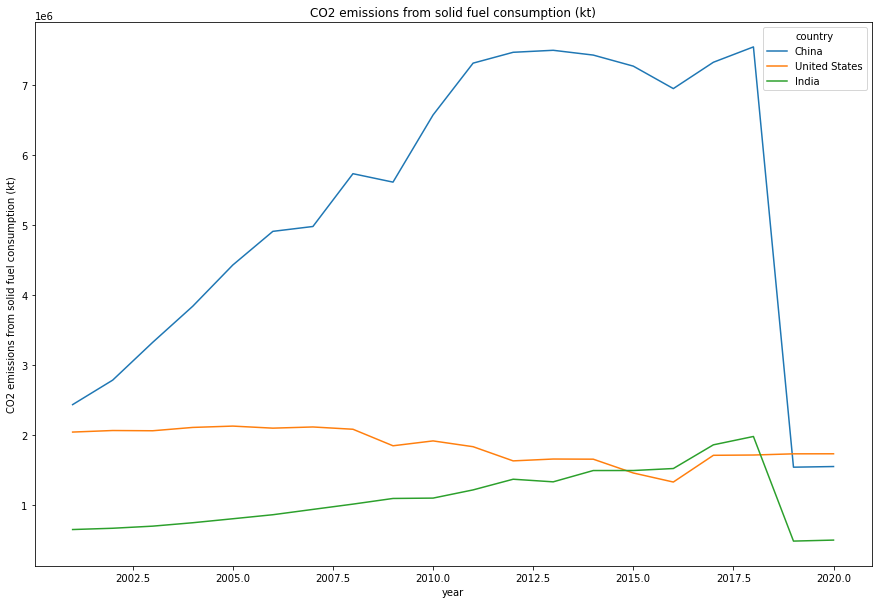

the specified column does not exists
*******************************************************************************************************************************


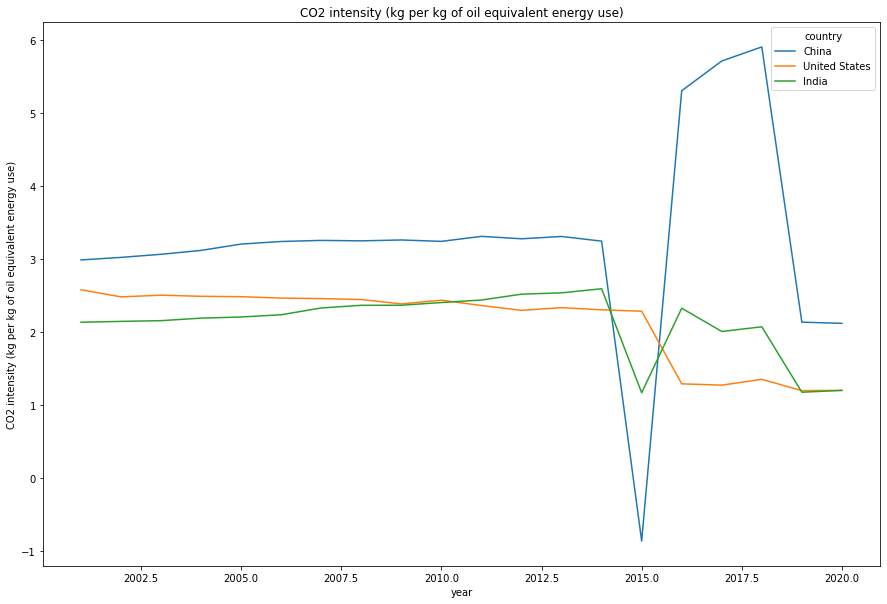

the specified column does not exists
*******************************************************************************************************************************


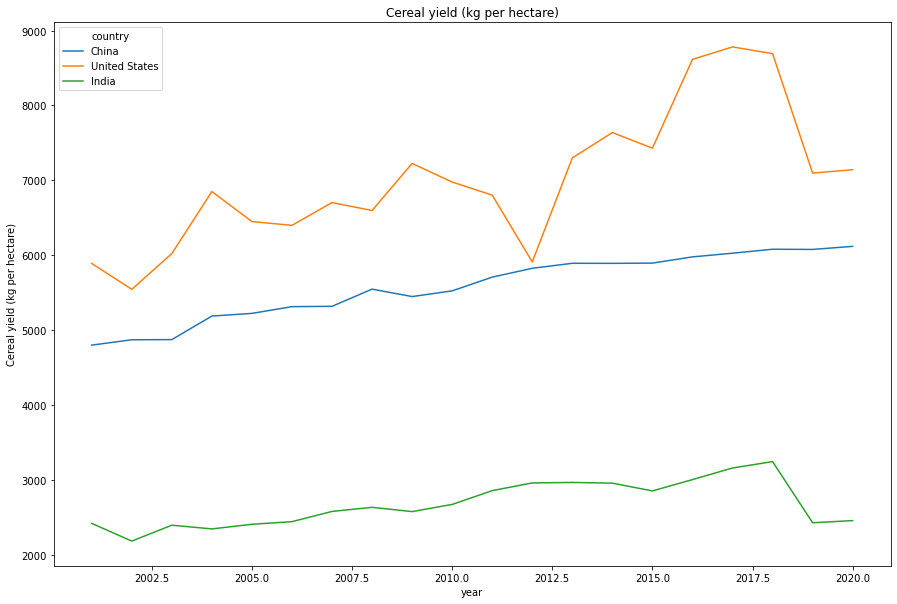

the specified column does not exists
*******************************************************************************************************************************


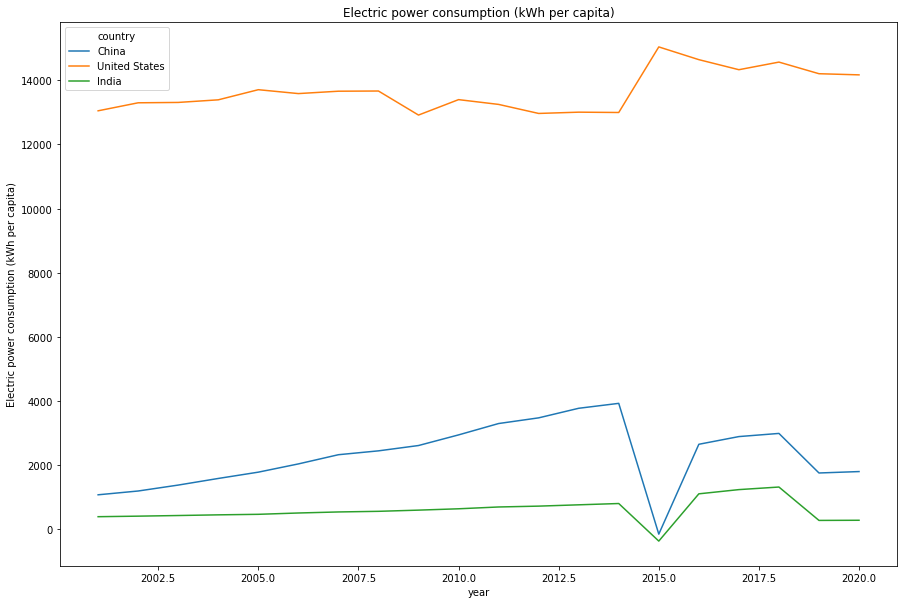

the specified column does not exists
*******************************************************************************************************************************


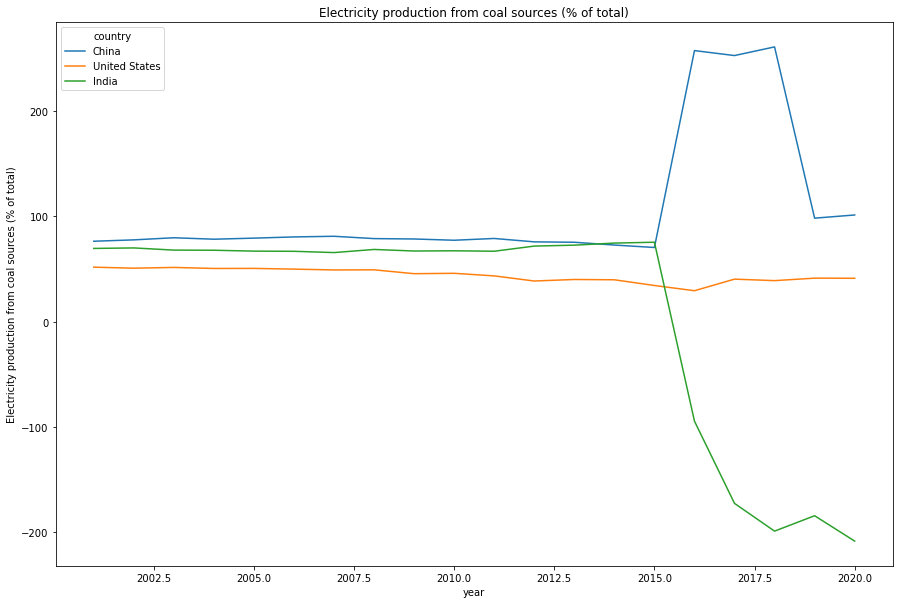

the specified column does not exists
*******************************************************************************************************************************


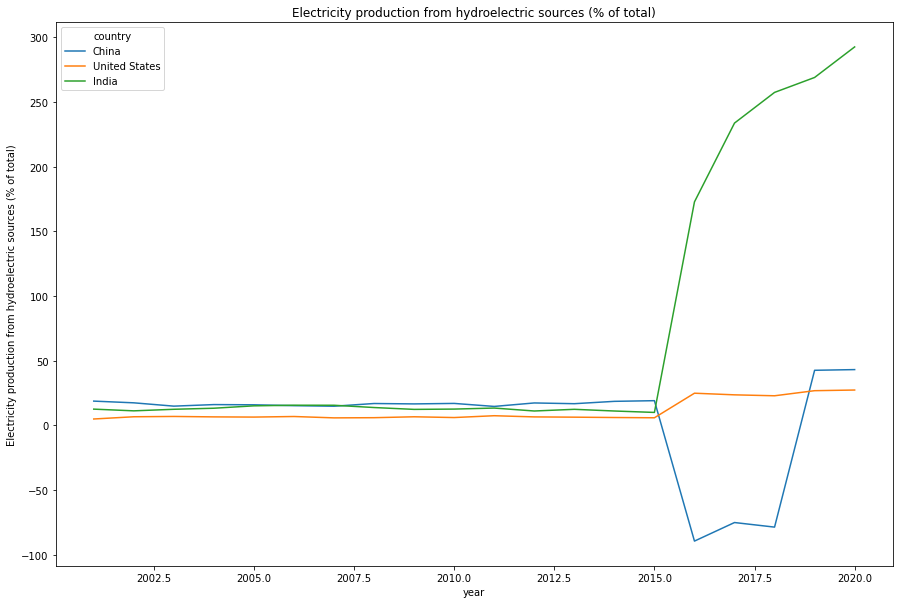

the specified column does not exists
*******************************************************************************************************************************


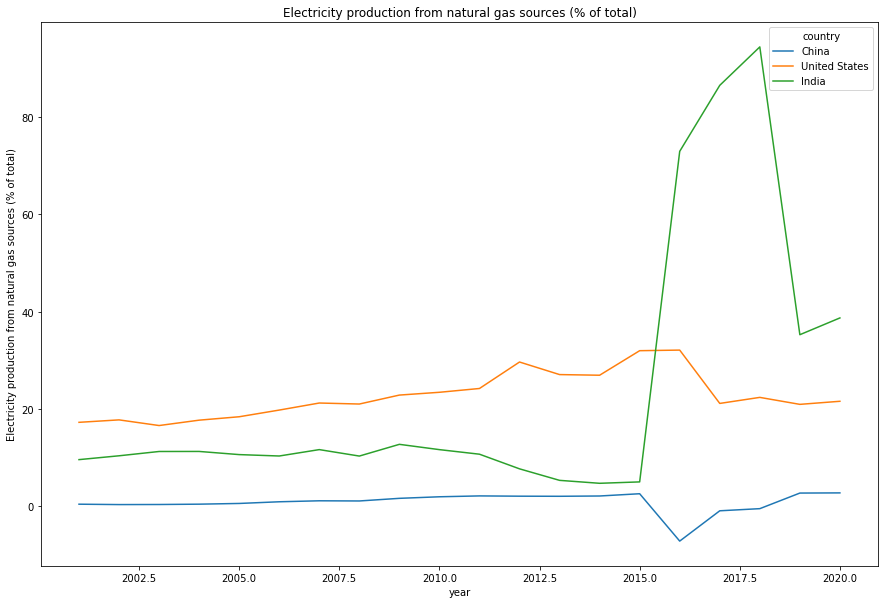

the specified column does not exists
*******************************************************************************************************************************


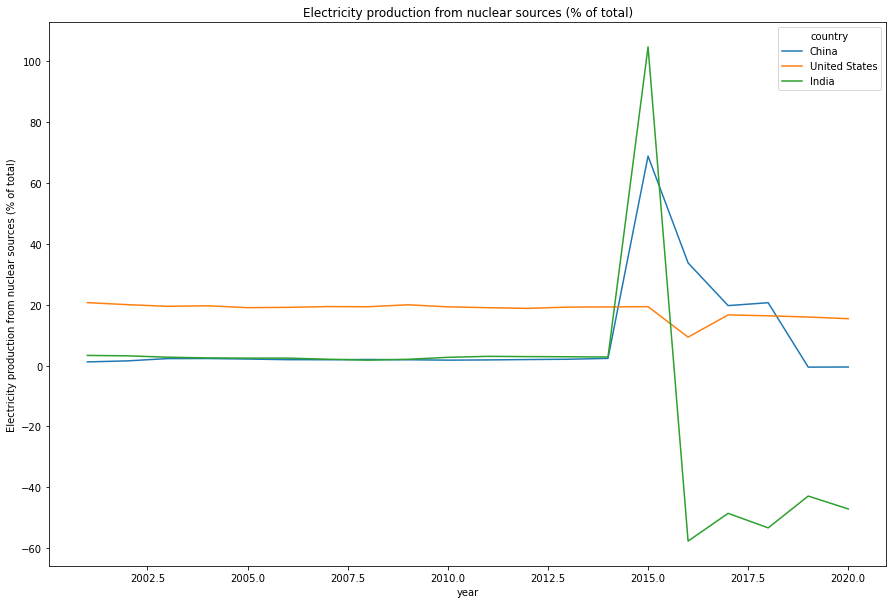

the specified column does not exists
*******************************************************************************************************************************


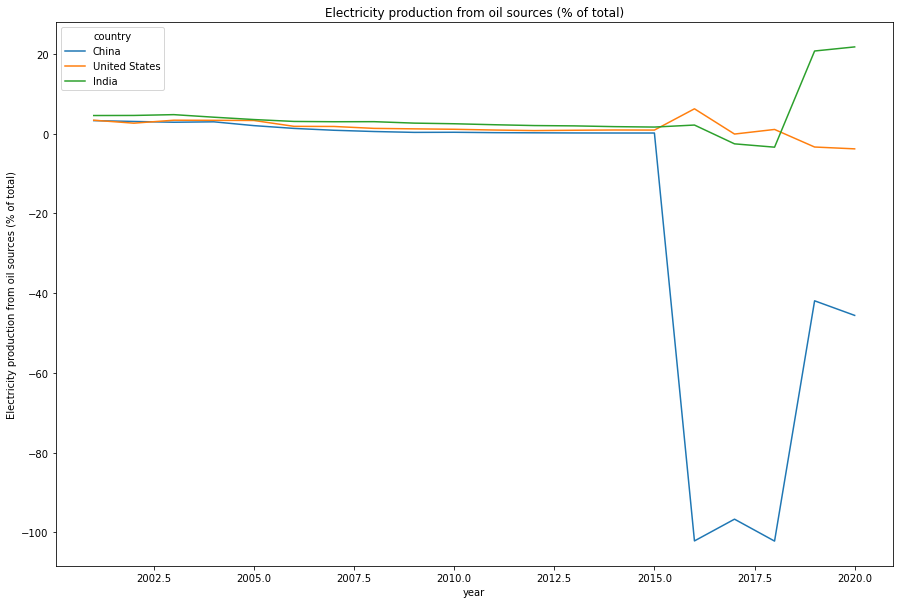

the specified column does not exists
*******************************************************************************************************************************


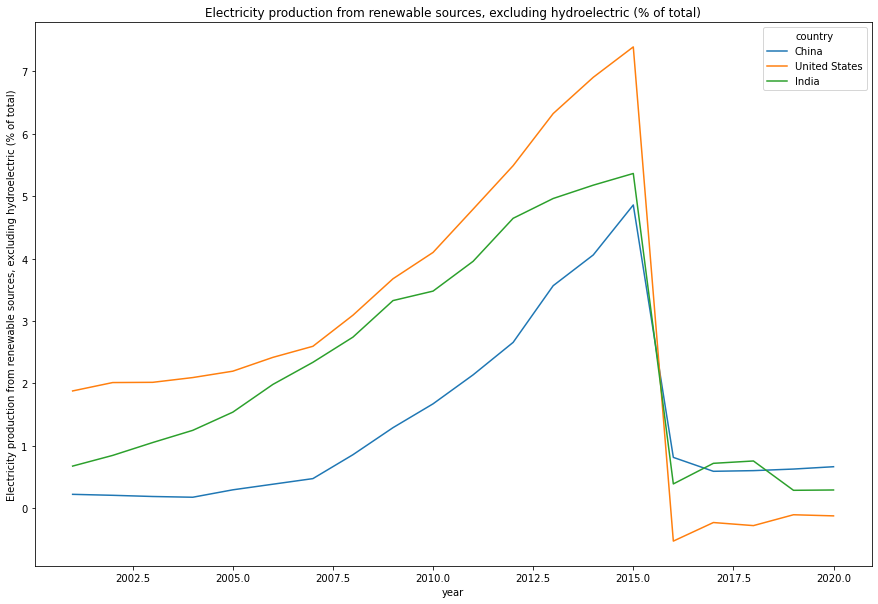

the specified column does not exists
*******************************************************************************************************************************


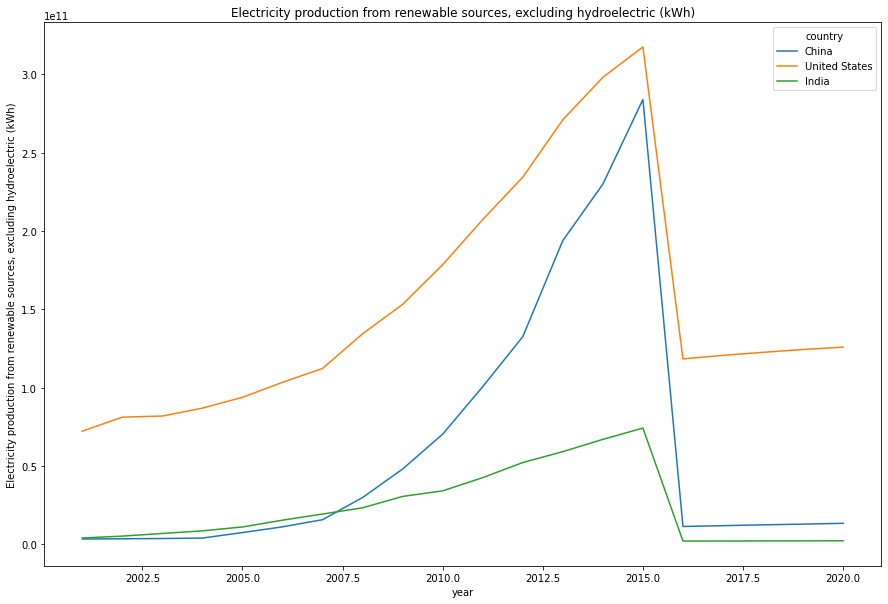

the specified column does not exists
*******************************************************************************************************************************


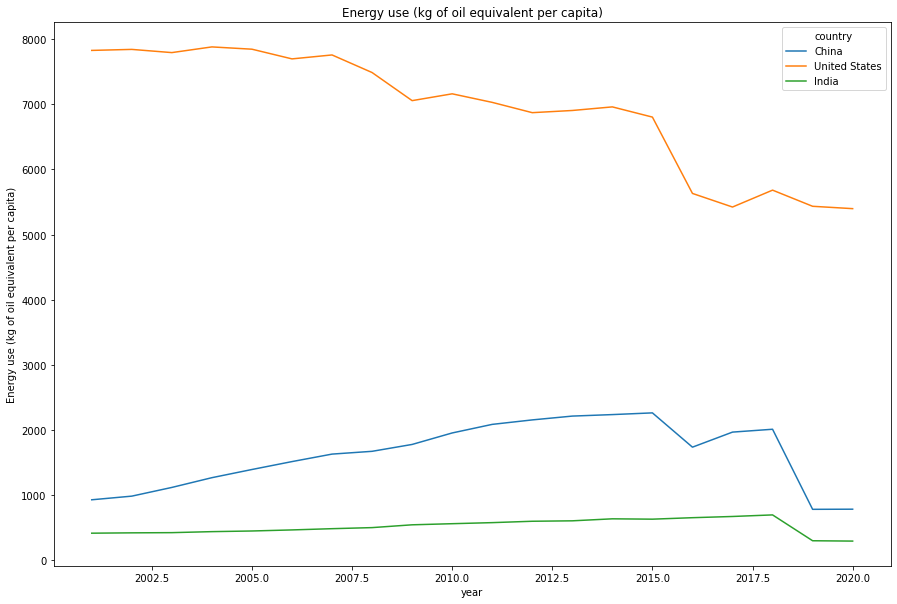

the specified column does not exists
*******************************************************************************************************************************


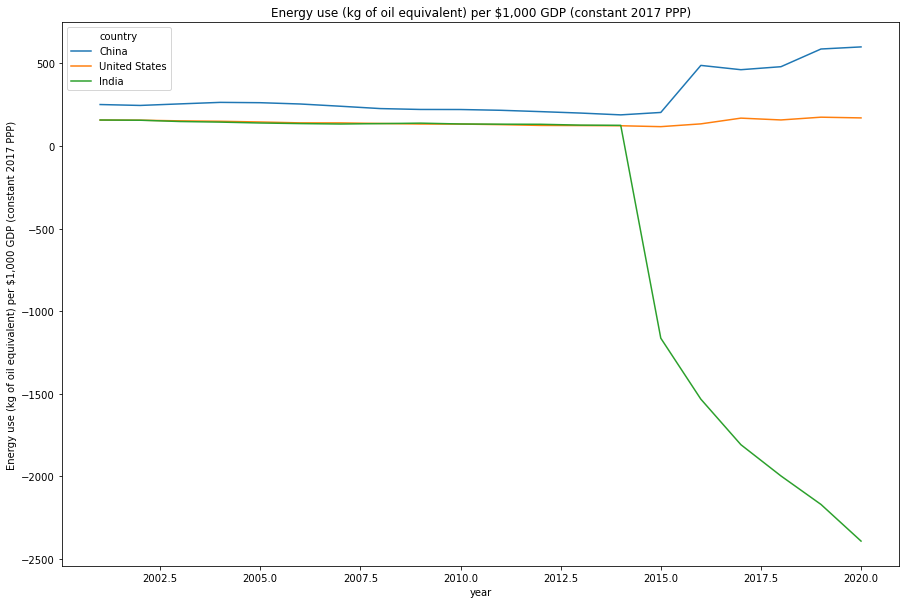

the specified column does not exists
*******************************************************************************************************************************


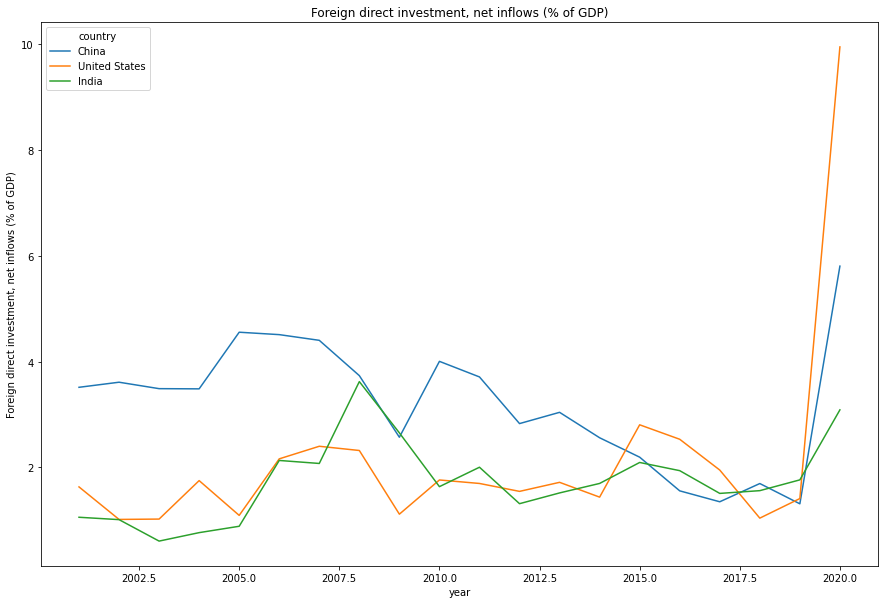

the specified column does not exists
*******************************************************************************************************************************


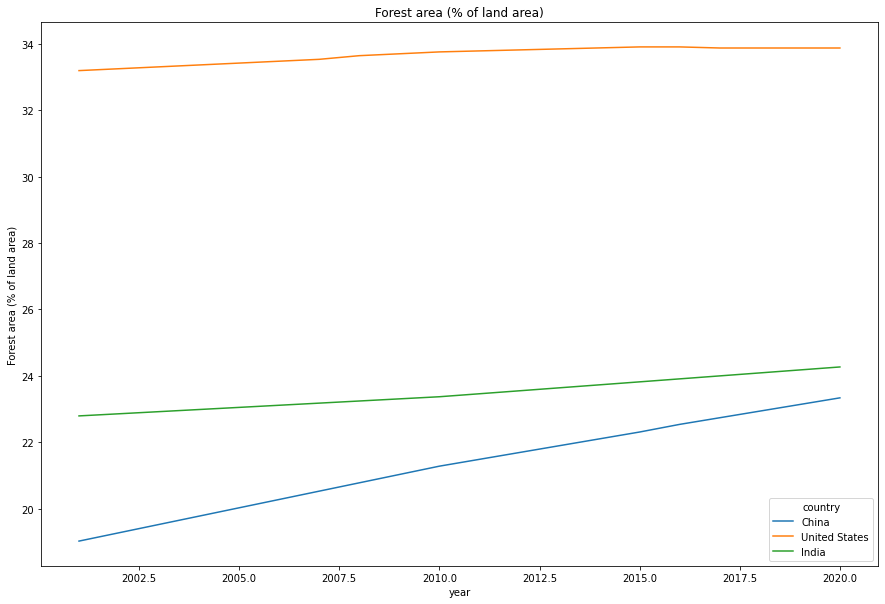

the specified column does not exists
*******************************************************************************************************************************


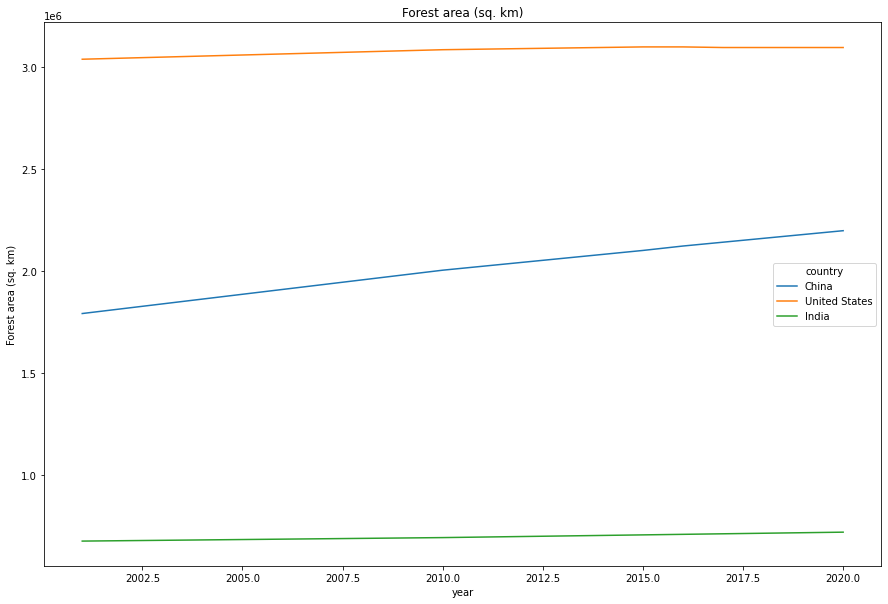

the specified column does not exists
*******************************************************************************************************************************


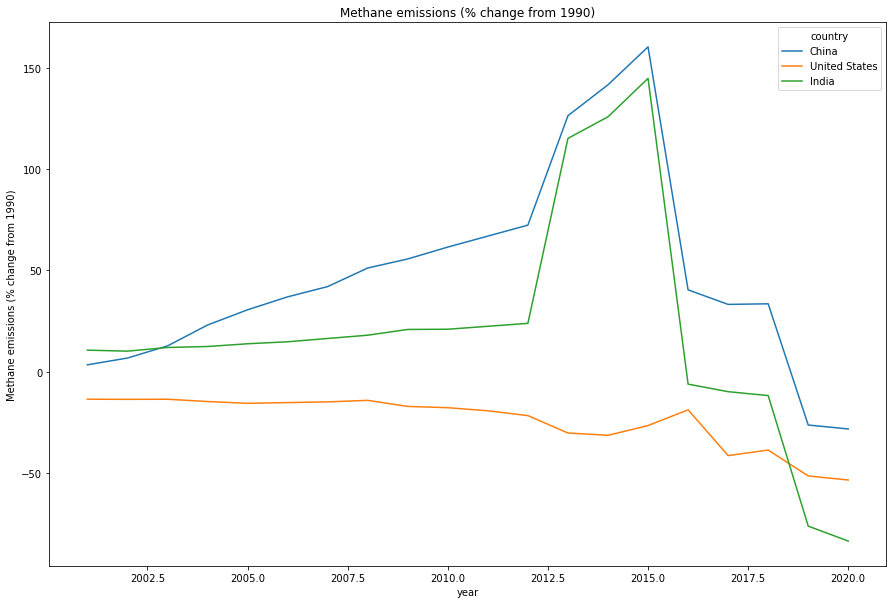

the specified column does not exists
*******************************************************************************************************************************


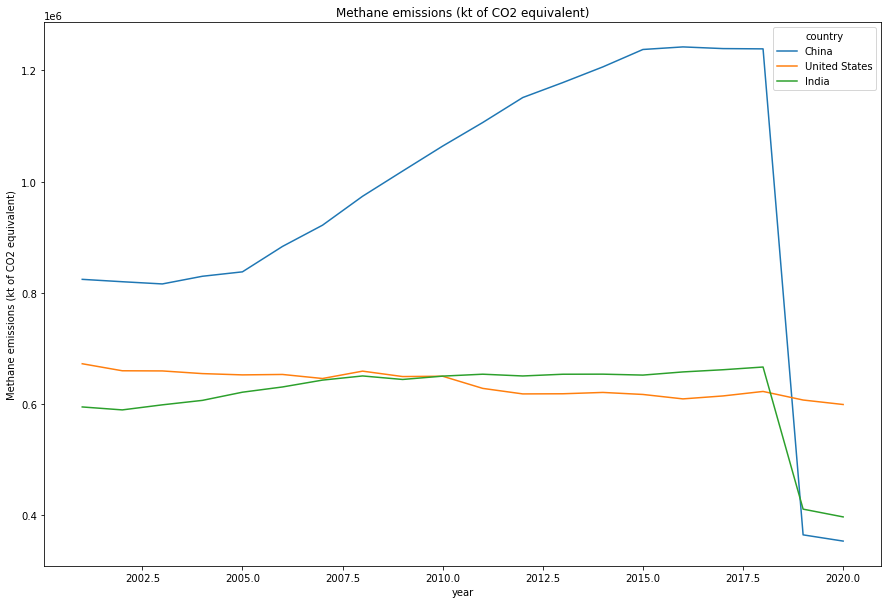

the specified column does not exists
*******************************************************************************************************************************


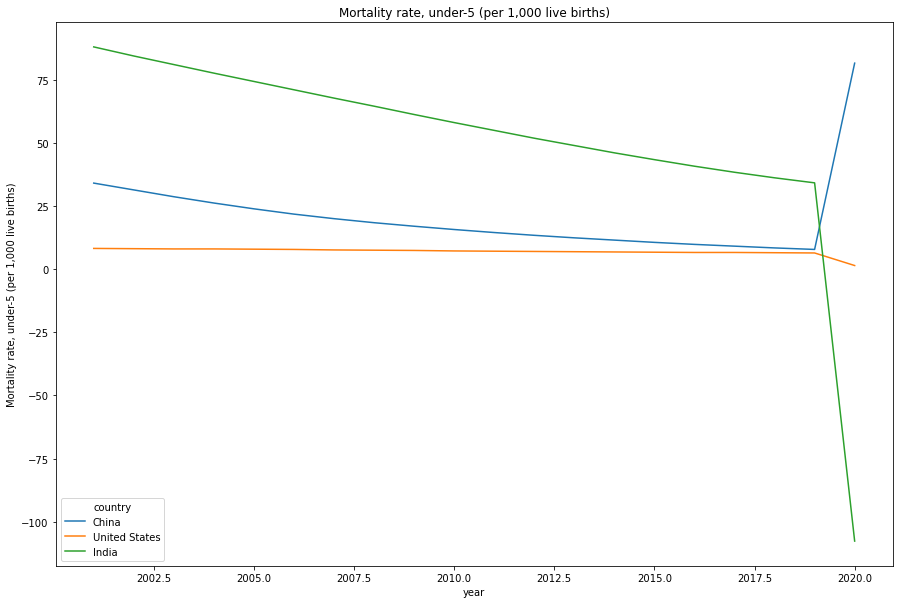

the specified column does not exists
*******************************************************************************************************************************


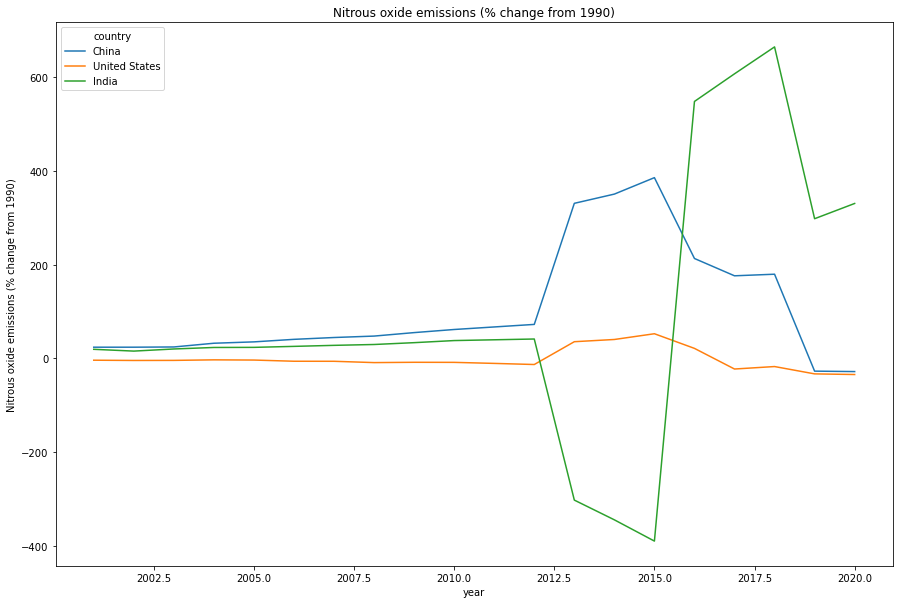

the specified column does not exists
*******************************************************************************************************************************


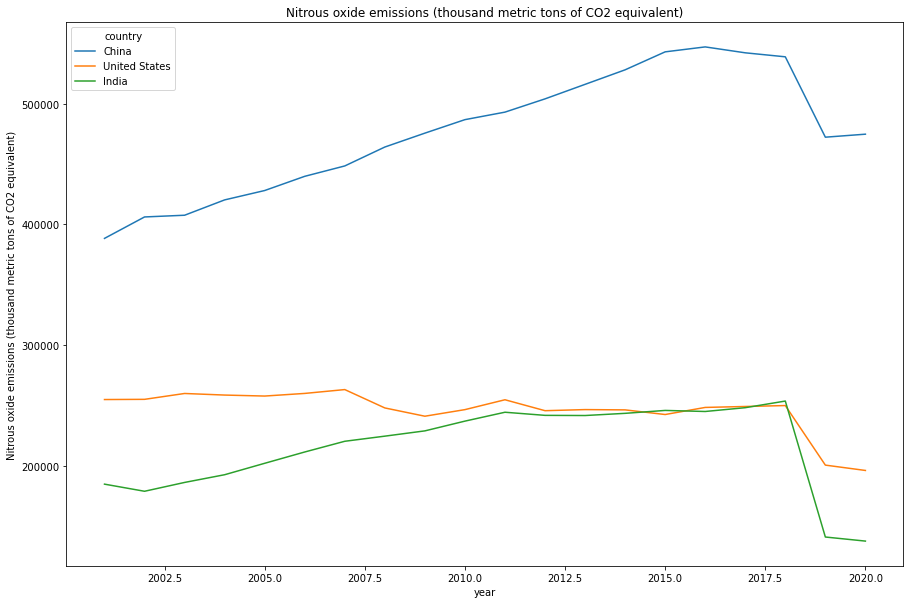

the specified column does not exists
*******************************************************************************************************************************


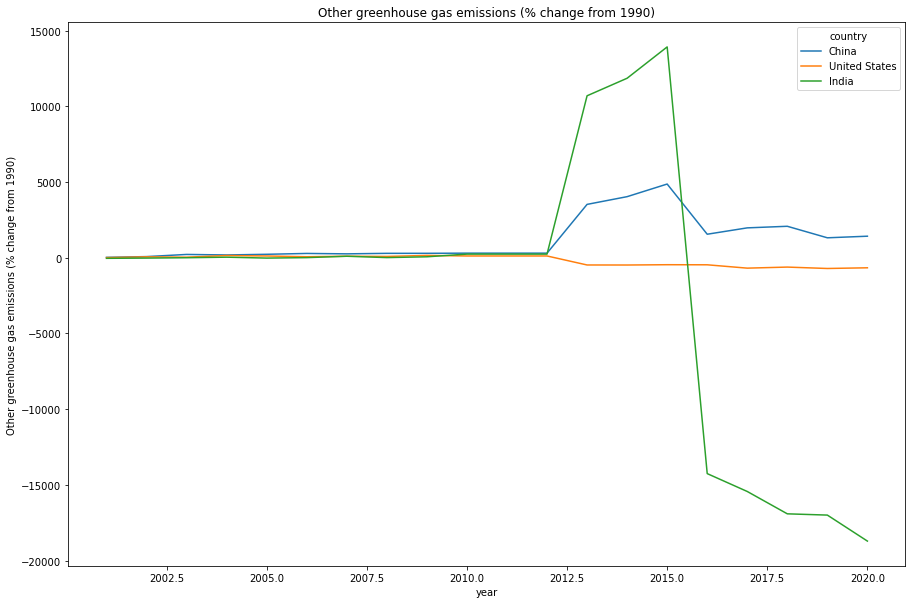

the specified column does not exists
*******************************************************************************************************************************


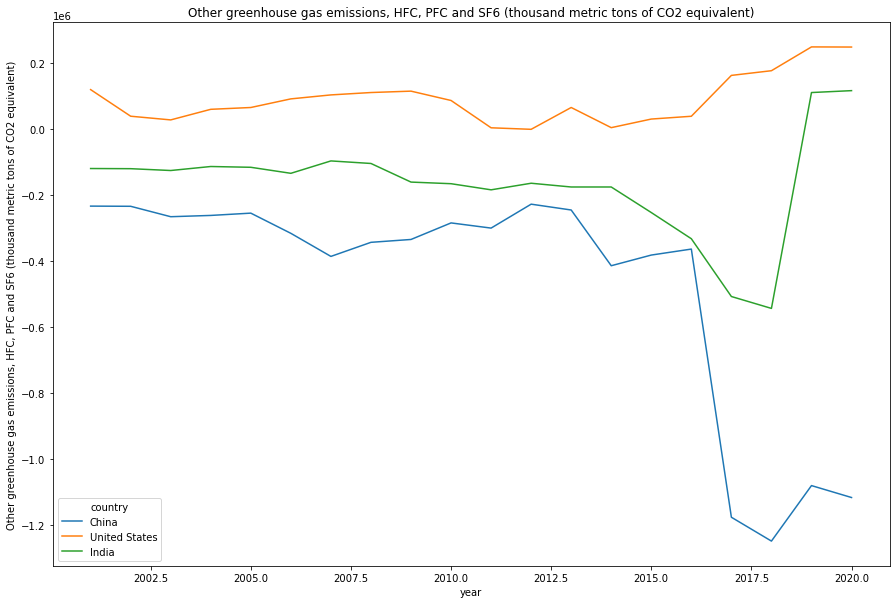

the specified column does not exists
*******************************************************************************************************************************


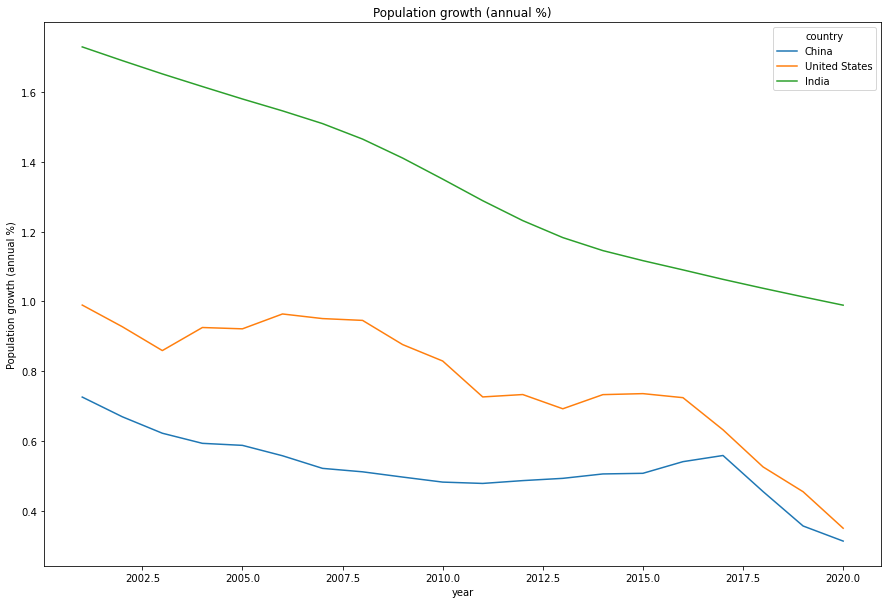

the specified column does not exists
*******************************************************************************************************************************


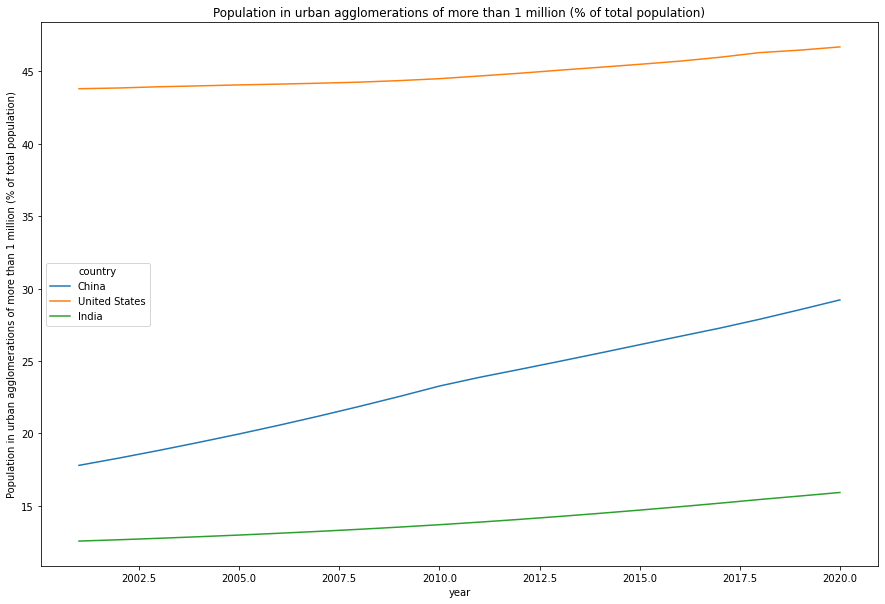

the specified column does not exists
*******************************************************************************************************************************


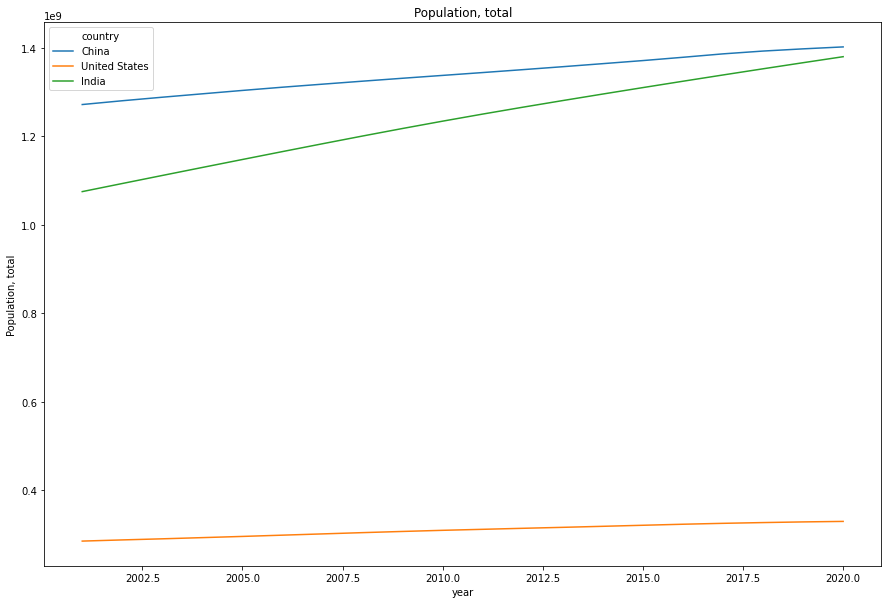

the specified column does not exists
*******************************************************************************************************************************


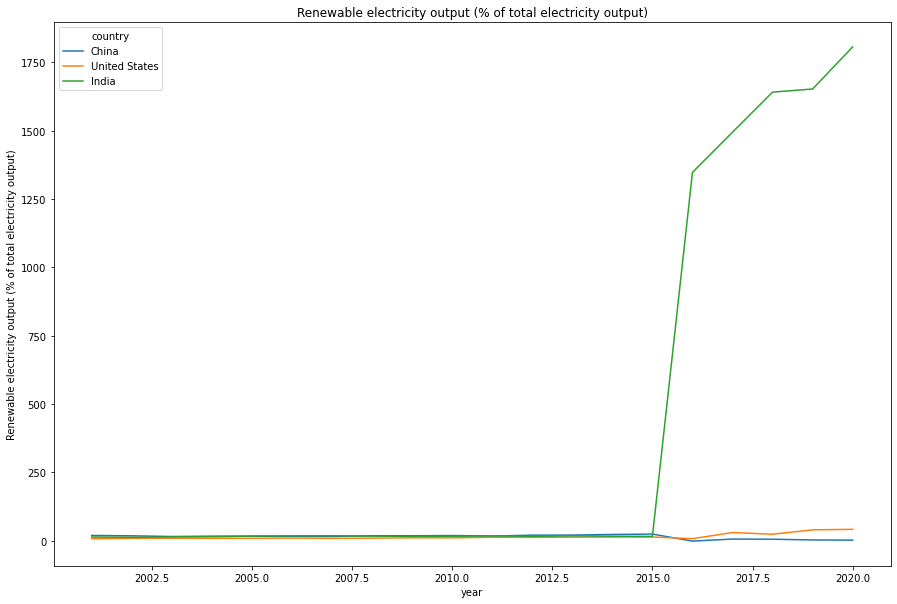

the specified column does not exists
*******************************************************************************************************************************


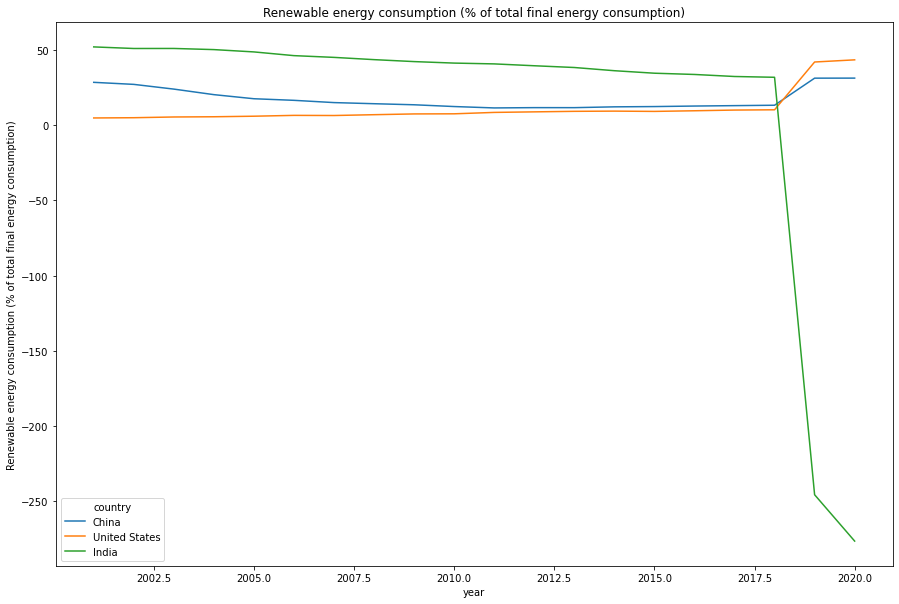

the specified column does not exists
*******************************************************************************************************************************


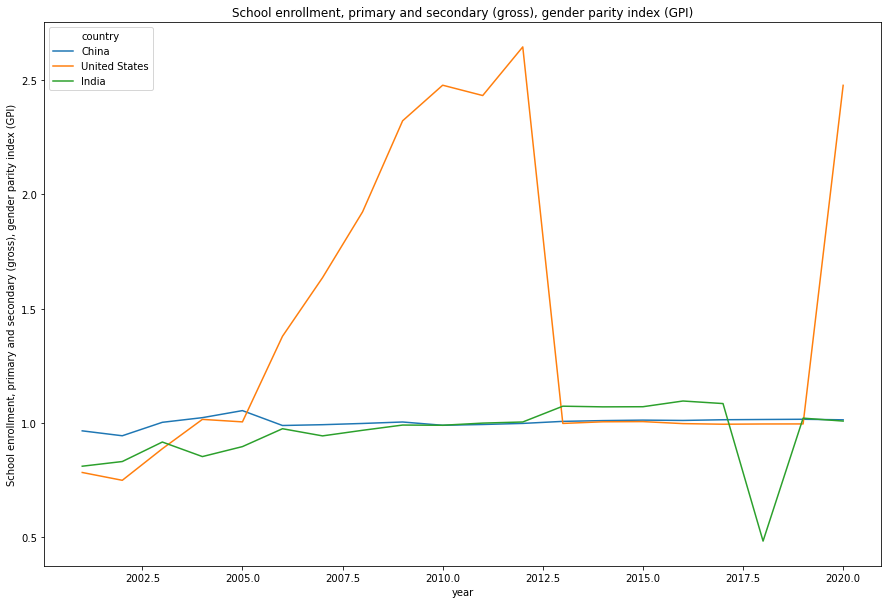

the specified column does not exists
*******************************************************************************************************************************


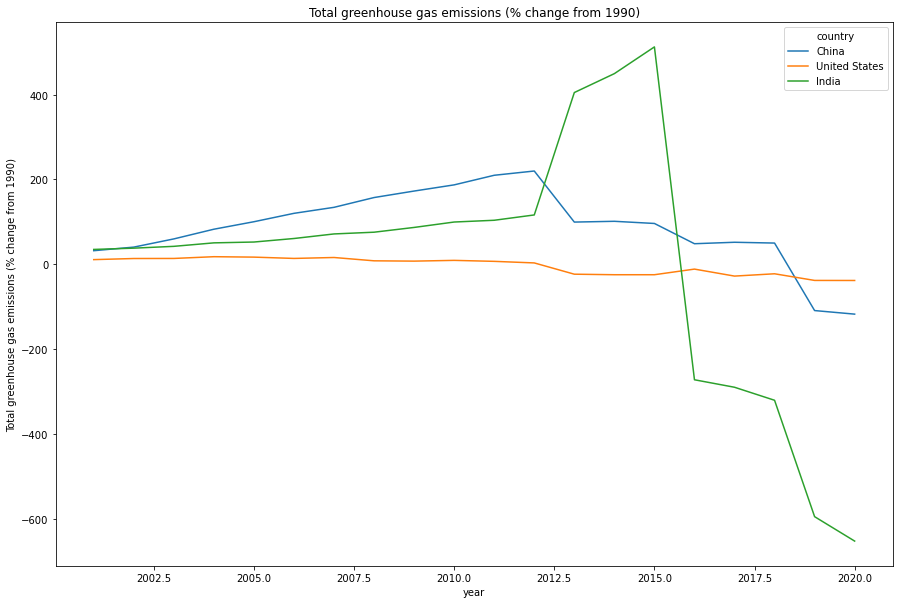

the specified column does not exists
*******************************************************************************************************************************


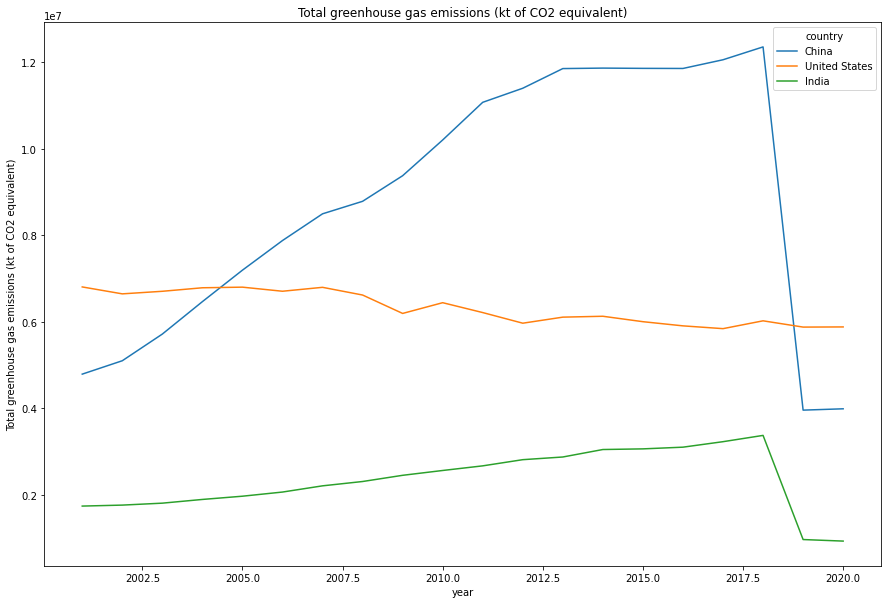

the specified column does not exists
*******************************************************************************************************************************


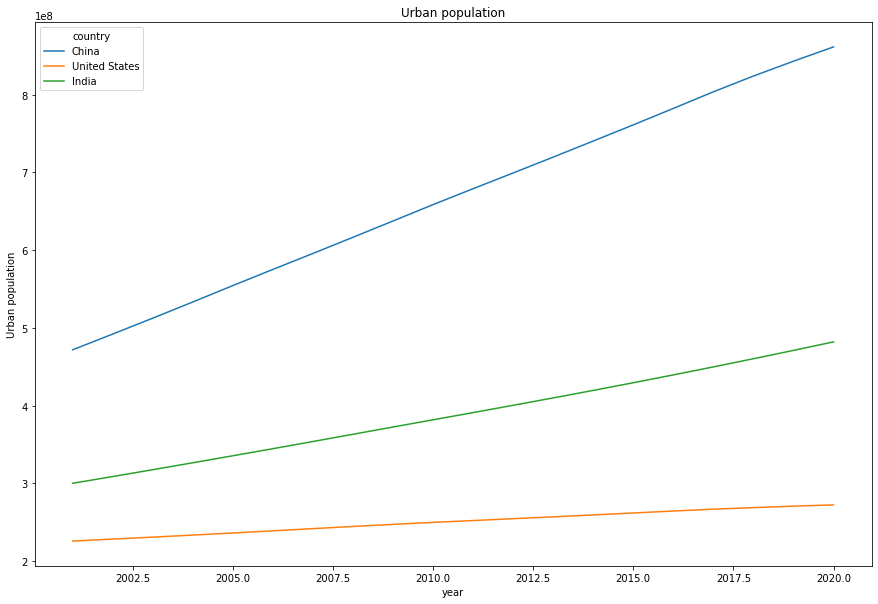

the specified column does not exists
*******************************************************************************************************************************


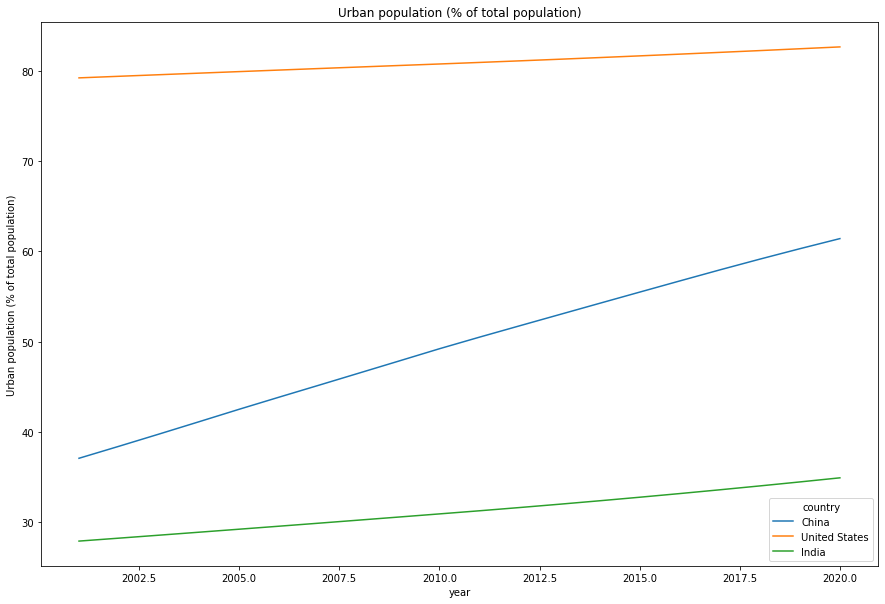

the specified column does not exists
*******************************************************************************************************************************


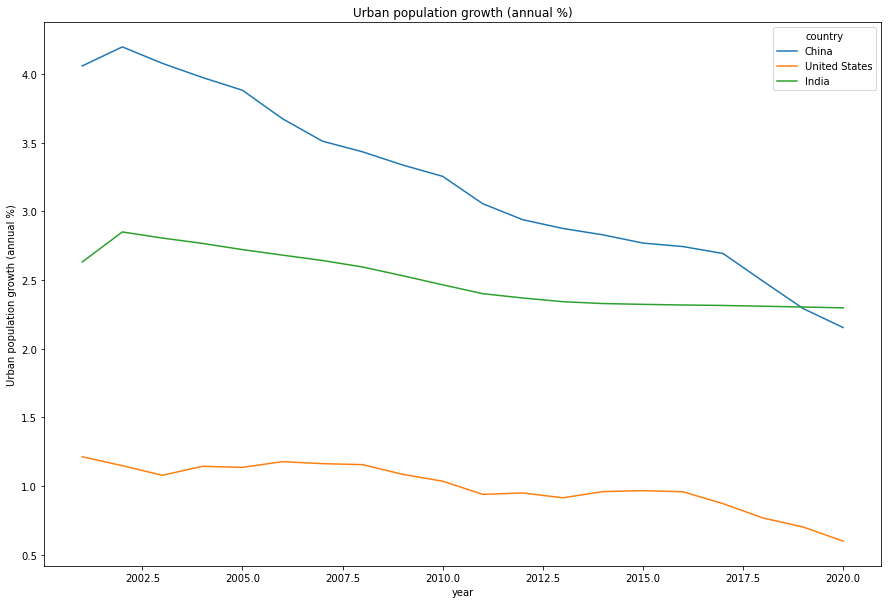

the specified column does not exists
*******************************************************************************************************************************


In [54]:
columns = df_india.iloc[:, 1:80].columns.tolist()

for col in columns:
    combined_lineplot(dfs, col)
    plt.show()
    print(get_column_desc(col))
    print('*' * 127)

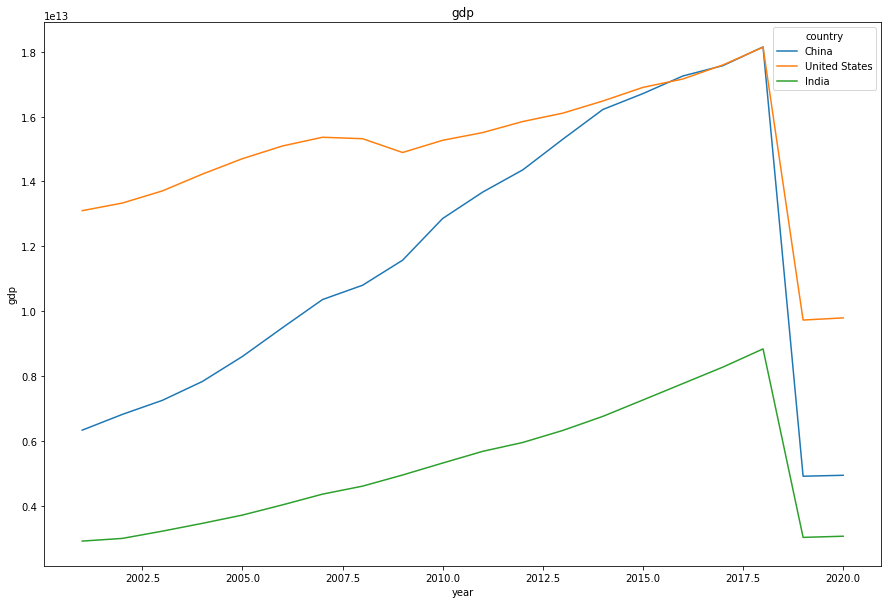

In [50]:
dfs = [df_china, df_us, df_india]
combined_lineplot(dfs, 'gdp')
plt.show()

<AxesSubplot:>

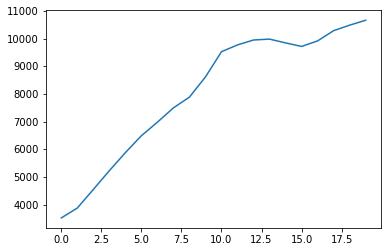

In [38]:
df_china.co2.plot()

<AxesSubplot:>

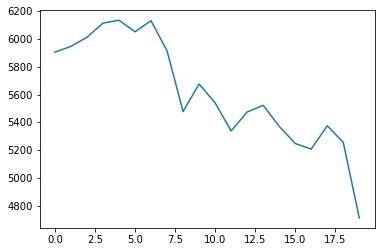

In [41]:
df_us.co2.plot()

<AxesSubplot:>

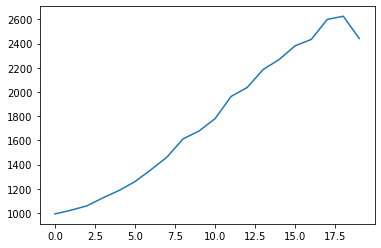

In [35]:
df_india.co2.plot()